# Gender Only UTMB Prediction Evaluation

This notebook evaluates the predictions made when similar runners of equal gender are found.

In [150]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [151]:
df = pd.read_csv('../../data/GO_pace_predictions.csv', encoding = "ISO-8859-1")

In [152]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.489501,12.994630,13.267151,13.267170,13.084611
1,1,Senior Men (23-39),Male,15.188612,13.489501,14.561941,15.165493,15.165590,14.544371
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.862793,15.946644,15.946630,16.087892
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.592674,16.020199,16.020118,15.783054
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.176924,14.177359,13.047495


In [153]:
df['pb_error'] = df.best_pb_prediction - df.query_pb
df['pb_error'] = df.pb_error.abs()
df['mean_error'] = df.mean_pb_average_pace - df.query_pb
df['mean_error'] = df.mean_error.abs()
df['cos_error'] = df.weighted_mean - df.query_pb
df['cos_error'] = df.cos_error.abs()
df['euc_error'] = df.euc_weighted_mean - df.query_pb
df['euc_error'] = df.euc_error.abs()

In [154]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
0,0,Senior Men (23-39),Male,14.183180,13.489501,12.994630,13.267151,13.267170,13.084611,0.494871,0.222350,0.222331,0.404891
1,1,Senior Men (23-39),Male,15.188612,13.489501,14.561941,15.165493,15.165590,14.544371,1.072440,1.675992,1.676088,1.054870
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.862793,15.946644,15.946630,16.087892,0.917679,2.001531,2.001517,2.142778
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.592674,16.020199,16.020118,15.783054,0.529317,0.898208,0.898127,0.661063
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.176924,14.177359,13.047495,0.411790,0.407076,0.407511,0.722353


In [155]:
df = df.dropna()

In [156]:
len(df)

1636

In [157]:
df.describe()

,Unnamed: 0,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,817.500000,14.819419,13.711955,12.693576,13.864991,13.864953,13.855769,1.415543,0.915270,0.915346,0.888025
std,472.416836,2.331642,2.389030,2.006991,2.082797,2.082809,2.124903,1.244795,0.883809,0.883790,0.877939
min,0.000000,7.408082,7.012357,7.020033,7.636395,7.636226,7.598918,0.001720,0.002312,0.002018,0.001553
25%,408.750000,13.605189,12.209777,11.214966,12.580764,12.580735,12.473732,0.499538,0.312980,0.312893,0.292291
50%,817.500000,15.336091,14.083469,12.919249,14.504542,14.504890,14.539110,1.099508,0.675482,0.675499,0.642177
75%,1226.250000,16.464805,15.494759,14.382895,15.526206,15.526394,15.565272,2.007853,1.289124,1.288061,1.230013
max,1635.000000,23.065424,21.825333,16.956204,16.867136,16.867308,16.912344,12.099311,8.405502,8.405593,8.657164


In [158]:
df.sort_values(by = 'weighted_mean')

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean,pb_error,mean_error,cos_error,euc_error
193,193,Senior Men (23-39),Male,7.416191,7.097568,7.020033,7.636395,7.636226,7.598918,0.077535,0.538827,0.538658,0.501350
815,815,Senior Men (23-39),Male,7.408082,7.012357,7.089808,7.708039,7.707968,7.633907,0.077450,0.695681,0.695611,0.621549
195,195,Youth Men (20-22),Male,7.599352,7.097568,7.193410,7.846926,7.846976,7.708483,0.095842,0.749357,0.749407,0.610915
930,930,Masters Men 1 (40-49),Male,7.612542,7.453740,7.205895,7.962389,7.962297,7.651181,0.247845,0.508649,0.508557,0.197441
1090,1090,Senior Men (23-39),Male,8.235962,8.056571,7.796014,8.001424,8.001417,8.100525,0.260557,0.055147,0.055154,0.043954
1596,1596,Senior Men (23-39),Male,8.039194,8.141435,7.609757,8.006512,8.006348,7.995451,0.531678,0.134923,0.135087,0.145984
1231,1231,Senior Men (23-39),Male,8.250002,8.106394,7.815027,8.009311,8.009133,7.927700,0.291367,0.097083,0.097261,0.178695
948,948,Senior Men (23-39),Male,7.761441,7.466542,7.496033,8.043536,8.043398,7.780287,0.029491,0.576993,0.576855,0.313744
1229,1229,Senior Men (23-39),Male,8.365903,8.124615,7.813504,8.072049,8.072043,8.176126,0.311112,0.052567,0.052573,0.051511
1595,1595,Senior Men (23-39),Male,8.140912,8.141435,7.711689,8.089196,8.088658,8.079071,0.429746,0.052239,0.052777,0.062364


# All

In [159]:

abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_average_pace))
aweightpb = sqrt(mean_squared_error(df.query_pb, df.weighted_mean))
aeucpb = sqrt(mean_squared_error(df.query_pb, df.euc_weighted_mean))

print('Fastest Case Error:', abestpb)
print('Mean of Cases Error:', ameanpb)
print('Weighted Mean:', aweightpb)
print('Euclidean Weighted Mean:', aeucpb)


Fastest Case Error: 1.8847623820941959
Mean of Cases Error: 1.2721480609217264
Weighted Mean: 1.2721891786533774
Euclidean Weighted Mean: 1.248556222378379


###  Percentage error

In [160]:
len(df)

1636

In [161]:
abestper = ((df.pb_error / df.query_pb) * 100).mean()
#astd = ((df.pb_error / df.query_pb) * 100).std()
ameanper = ((df.mean_error / df.query_pb) * 100).mean()
acosper = ((df.cos_error / df.query_pb) * 100).mean()
aeucper = ((df.euc_error / df.query_pb) * 100).mean()

print('Fastest Case Percentage: ', abestper)
print('Mean of Cases Percentage: ',  ameanper)
print('Cosine Mean %:',  acosper)
print('Euclidean Mean %: ', aeucper)

Fastest Case Percentage:  9.946898908136273
Mean of Cases Percentage:  6.8867587579572085
Cosine Mean %: 6.887257503414209
Euclidean Mean %:  6.661457666127492


# Male

In [162]:
male = df[df.gender == 'Male']

In [163]:
len(male)

1519

In [164]:


mbestpb = sqrt(mean_squared_error(male.query_pb, male.best_pb_prediction))
mmeanpb = sqrt(mean_squared_error(male.query_pb, male.mean_pb_average_pace))
mweightpb = sqrt(mean_squared_error(male.query_pb, male.weighted_mean))
meucpb = sqrt(mean_squared_error(male.query_pb, male.euc_weighted_mean))

print('Male Fastest Case Error:', mbestpb)
print('Male Mean of Cases Error:', mmeanpb)
print('Male Weighted Mean of Cases Error:', mweightpb)
print('Male Euclidean Weighted Mean of Cases Error:', meucpb)

Male Fastest Case Error: 1.8813387923549383
Male Mean of Cases Error: 1.2893759845070996
Male Weighted Mean of Cases Error: 1.2894038826720349
Male Euclidean Weighted Mean of Cases Error: 1.2642648372016867


###  Percentage error

In [165]:
mbestper = ((male.pb_error / male.query_pb) * 100).mean()
mmeanper = ((male.mean_error / male.query_pb) * 100).mean()
mcosper = ((male.cos_error / male.query_pb) * 100).mean()
meucper = ((male.euc_error / male.query_pb) * 100).mean()

print('Fastest Case Percentage: ', mbestper)
print('Mean of Cases Percentage: ',  mmeanper)
print('Cosine Mean %:',  mcosper)
print('Euclidean Mean %: ', meucper)

Fastest Case Percentage:  9.94386174525167
Mean of Cases Percentage:  6.99121410339836
Cosine Mean %: 6.991374089625164
Euclidean Mean %:  6.748010054497112


# Female

In [166]:
female = df[df.gender == 'Female']

In [167]:
len(female)

117

In [168]:


fbestpb = sqrt(mean_squared_error(female.query_pb, female.best_pb_prediction))
fmeanpb = sqrt(mean_squared_error(female.query_pb, female.mean_pb_average_pace))
fweightpb = sqrt(mean_squared_error(female.query_pb, female.weighted_mean))
feucpb = sqrt(mean_squared_error(female.query_pb, female.euc_weighted_mean))

print('Female Fastest Case Error:', fbestpb)
print('Female Mean of Cases Error:', fmeanpb)
print('Female Weighted Mean of Cases Error', fweightpb)
print('Female Euclidean Weighted Mean of Cases Error:', feucpb)

Female Fastest Case Error: 1.928658975345636
Female Mean of Cases Error: 1.0224619390119063
Female Weighted Mean of Cases Error 1.0227205089947604
Female Euclidean Weighted Mean of Cases Error: 1.022946330770222


###  Percentage error

In [169]:
fbestper = ((female.pb_error / female.query_pb) * 100).mean()
fmeanper = ((female.mean_error / female.query_pb) * 100).mean()
fcosper = ((female.cos_error / female.query_pb) * 100).mean()
feucper = ((female.euc_error / female.query_pb) * 100).mean()

print('Fastest Case Percentage: ', fbestper)
print('Mean of Cases Percentage: ',  fmeanper)
print('Cosine Mean %:',  fcosper)
print('Euclidean Mean %: ', feucper)

Fastest Case Percentage:  9.986330108321786
Mean of Cases Percentage:  5.530624828682694
Cosine Mean %: 5.535521653376267
Euclidean Mean %:  5.537756145328705


In [170]:
mean = [ameanpb, mmeanpb, fmeanpb ]
best = [abestpb, mbestpb, fbestpb]
w_mean = [aweightpb, mweightpb, fweightpb]
euc_mean =[aeucpb, meucpb, feucpb]

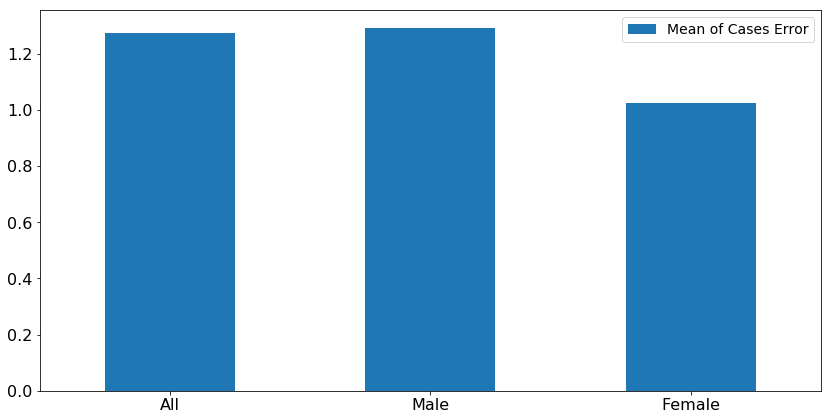

In [171]:
index = ['All', 'Male',  'Female']
gra = pd.DataFrame({'Mean of Cases Error': mean}, index=index)
ax = gra.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

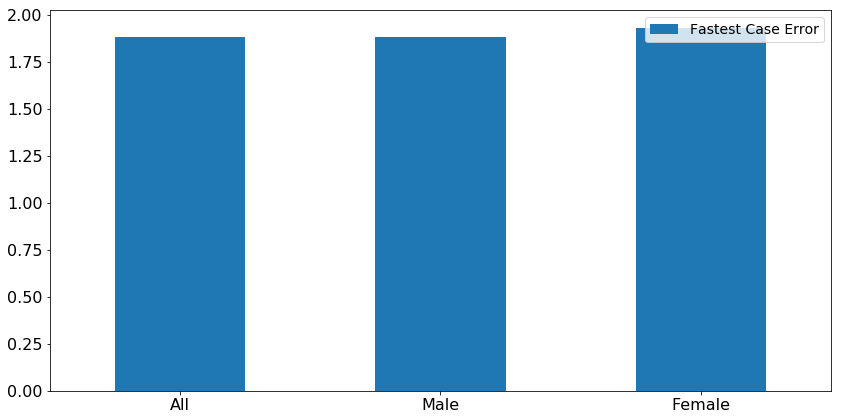

In [172]:
index = ['All', 'Male', 'Female']
gra2 = pd.DataFrame({'Fastest Case Error': best}, index=index)
ax = gra2.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

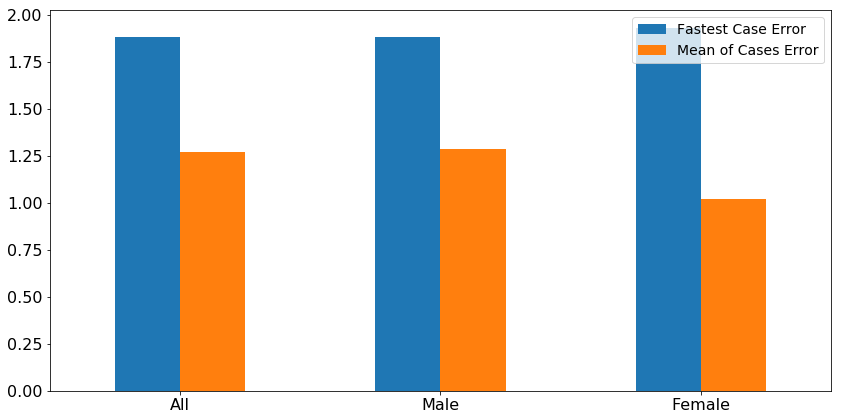

In [173]:
index = ['All', 'Male', 'Female']
gra1 = pd.DataFrame({'Mean of Cases Error': mean, 'Fastest Case Error': best}, index=index)
ax = gra1.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

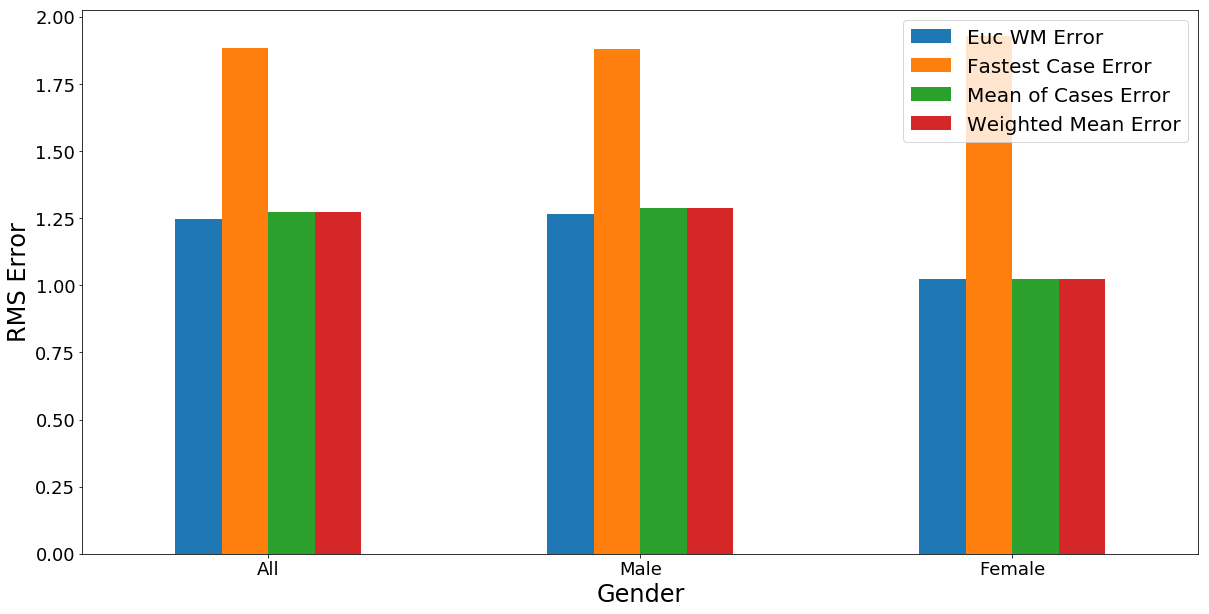

In [174]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'Mean of Cases Error': mean, 'Fastest Case Error': best, 'Weighted Mean Error': w_mean, 'Euc WM Error': euc_mean}, index=index)
ax = gra_w.plot.bar(figsize=(20, 10), fontsize=18, rot=0)
ax.set_ylabel('RMS Error', fontsize = 24)
ax.set_xlabel('Gender', fontsize = 24)
ax.legend(fontsize = 20)

In [175]:
mean = [ameanper, mmeanper, fmeanper ]
best = [abestper, mbestper, fbestper]
w_mean = [acosper, mcosper, fcosper]
euc_mean =[aeucper, meucper, feucper]

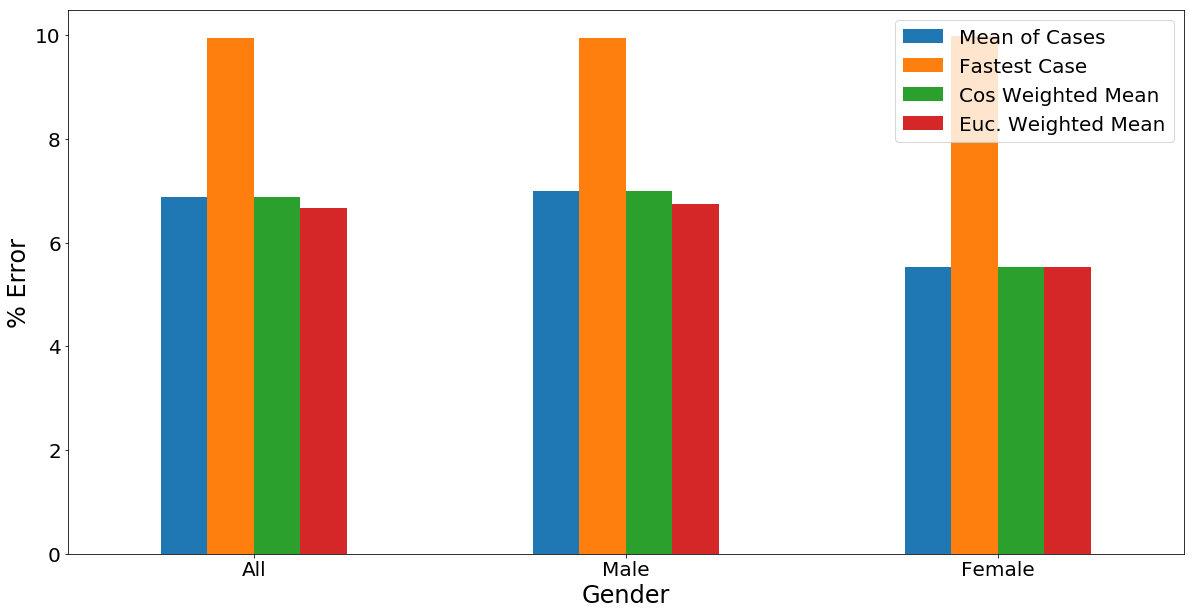

In [176]:
index = ['All', 'Male', 'Female']
gra_w = pd.DataFrame({'Euc. Weighted Mean': euc_mean, 'Fastest Case': best, 'Cos Weighted Mean': w_mean, 'Mean of Cases': mean}, index=index)
gra_w = gra_w[['Mean of Cases', 'Fastest Case', 'Cos Weighted Mean', 'Euc. Weighted Mean']]
ax = gra_w.plot.bar(figsize=(20, 10), fontsize=20, rot=0)
ax.set_ylabel('% Error', fontsize = 24)
ax.set_xlabel('Gender', fontsize = 24)
ax.legend(fontsize = 20)

In [177]:
euc_mean

[6.661457666127492, 6.748010054497112, 5.537756145328705]

# Categories

In [178]:
sen = df[df.category == 'Senior Men (23-39)']

mas = df[df.category == 'Masters Men 1 (40-49)']

mas2 = df[df.category == 'Masters Men 2 (50-59)']

mas3 = df[df.category == 'Masters Men 3 (60-69)']

wom1 = df[df.category == 'Masters Women 1 (40-49)']

wom2 = df[df.category == 'Masters Women 2 (50-59)']

senW = df[df.category == 'Senior Women (23-39)']

you = df[df.category == 'Youth Men (20-22)']

In [179]:

snrB = sqrt(mean_squared_error(sen.query_pb, sen.best_pb_prediction))
snrM = sqrt(mean_squared_error(sen.query_pb, sen.mean_pb_average_pace))
snrw = sqrt(mean_squared_error(sen.query_pb, sen.weighted_mean))
snrE = sqrt(mean_squared_error(sen.query_pb, sen.euc_weighted_mean))

mas1B = sqrt(mean_squared_error(mas.query_pb, mas.best_pb_prediction))
mas1M = sqrt(mean_squared_error(mas.query_pb, mas.mean_pb_average_pace))
mas1BW = sqrt(mean_squared_error(mas.query_pb, mas.weighted_mean))
mas1ME = sqrt(mean_squared_error(mas.query_pb, mas.euc_weighted_mean))

mas2B = sqrt(mean_squared_error(mas2.query_pb, mas2.best_pb_prediction))
mas2M = sqrt(mean_squared_error(mas2.query_pb, mas2.mean_pb_average_pace))

mas3B = sqrt(mean_squared_error(mas3.query_pb, mas3.best_pb_prediction))
mas3M = sqrt(mean_squared_error(mas3.query_pb, mas3.mean_pb_average_pace))

wom1B = sqrt(mean_squared_error(wom1.query_pb, wom1.best_pb_prediction))
wom1M = sqrt(mean_squared_error(wom1.query_pb, wom1.mean_pb_average_pace))

wom2B = sqrt(mean_squared_error(wom2.query_pb, wom2.best_pb_prediction))
wom2M = sqrt(mean_squared_error(wom2.query_pb, wom2.mean_pb_average_pace))

senWB = sqrt(mean_squared_error(senW.query_pb, senW.best_pb_prediction))
senWM = sqrt(mean_squared_error(senW.query_pb, senW.mean_pb_average_pace))

youB = sqrt(mean_squared_error(you.query_pb, you.best_pb_prediction))
youM = sqrt(mean_squared_error(you.query_pb, you.mean_pb_average_pace))

print('Senior Men Fastest Case Error:', snrB)
print('Senior Men Mean of Cases Error:', snrM)
print('Master 1 Fastest Case Error:', mas1B)
print('Master 1 Mean of Cases Error:', mas1M)
print('Master 2 Fastest Case Error:', mas2B)
print('Master 2 Mean of Cases Error:', mas2M)
print('Master 3 Fastest Case Error:', mas3B)
print('Master 3 Mean of Cases Error:', mas3M)
print('Master Women 1 Fastest Case Error:', wom1B)
print('Master Women 1 Mean of Cases Error:', wom1M)
print('Master Women 2 Fastest Case Error:', wom2B)
print('Master Women 2 Mean of Cases Error:', wom2M)
print('Senior Women Fastest Case Error:', senWB)
print('Senior Women Mean of Cases Error:', senWM)
print('Youth Men Fastest Case Error:', youB)
print('Youth Men Mean of Cases Error:', youM)

Senior Men Fastest Case Error: 1.808871435199128
Senior Men Mean of Cases Error: 1.429706088375706
Master 1 Fastest Case Error: 1.8566365542398495
Master 1 Mean of Cases Error: 1.1427100947548094
Master 2 Fastest Case Error: 2.0834777580662562
Master 2 Mean of Cases Error: 1.3824517063889379
Master 3 Fastest Case Error: 1.6799237005949446
Master 3 Mean of Cases Error: 0.695863469178525
Master Women 1 Fastest Case Error: 1.7799566776188305
Master Women 1 Mean of Cases Error: 0.7428971275826977
Master Women 2 Fastest Case Error: 2.0814406628226587
Master Women 2 Mean of Cases Error: 1.235454054170419
Senior Women Fastest Case Error: 2.03903441223154
Senior Women Mean of Cases Error: 1.1715323645060558
Youth Men Fastest Case Error: 1.429283157321394
Youth Men Mean of Cases Error: 2.2680813478894346


In [180]:
mean1 = [snrM, mas1M, mas2M, mas3M, wom1M, wom2M, senWM]
best1 = [snrB, mas1B, mas2B, mas3B, wom1B, wom2B, senWB]

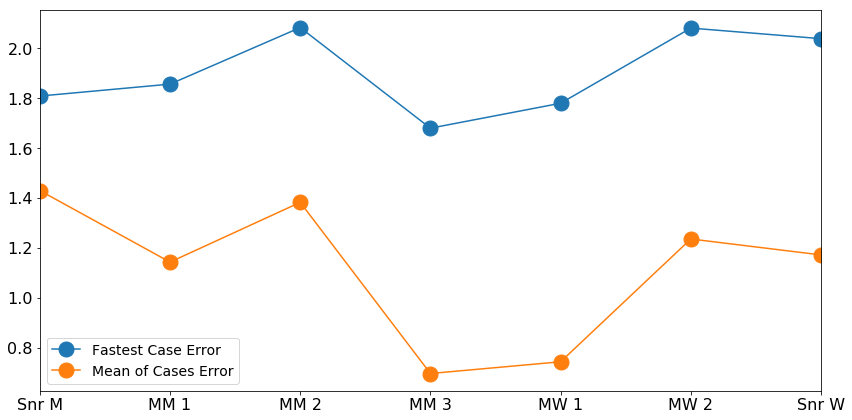

In [181]:
index = ['Snr M', 'MM 1', 'MM 2', 'MM 3', 'MW 1', 'MW 2', 'Snr W']
gra3 = pd.DataFrame({'Mean of Cases Error': mean1, 'Fastest Case Error': best1}, index=index)
ax = gra3.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Ability

In [182]:
g9 = df[(df.query_pb <= 9)]
g11 = df[(df.query_pb > 9) & (df.query_pb <= 11)]
g13 = df[(df.query_pb > 11) & (df.query_pb <= 13)]
g15 = df[(df.query_pb > 13) & (df.query_pb <= 15)]
g17 = df[(df.query_pb > 15) & (df.query_pb <= 17)]
g19 = df[(df.query_pb > 17)]

## Bin counts

In [183]:
g9count = g9.shape[0]
g11count = g11.shape[0]
g13count = g13.shape[0]
g15count = g15.shape[0]
g17count = g17.shape[0]
g19count = g19.shape[0]

In [184]:
print(g9count)
print(g11count)
print(g13count) 
print(g15count)
print(g17count)
print(g19count) 

77
174
323
508
477
77


In [185]:
count = [g9count, g11count, g13count, g15count, g17count, g19count]

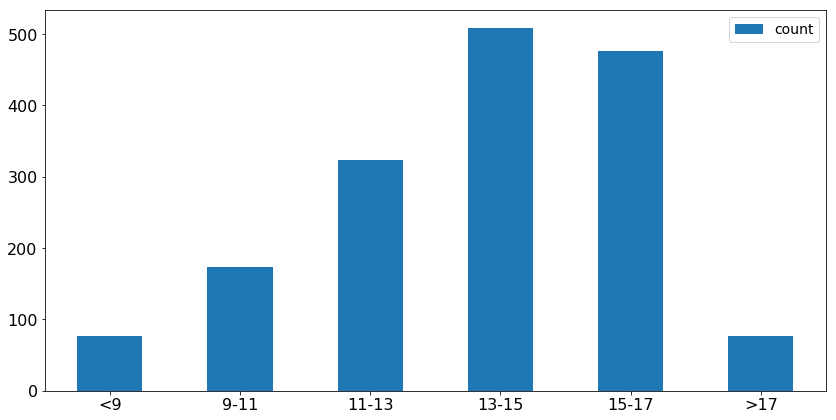

In [186]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra7 = pd.DataFrame({'count': count}, index=index)
ax = gra7.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [187]:


g9B = sqrt(mean_squared_error(g9.query_pb, g9.best_pb_prediction))
g9M = sqrt(mean_squared_error(g9.query_pb, g9.mean_pb_average_pace))
g9W = sqrt(mean_squared_error(g9.query_pb, g9.weighted_mean))
g9E = sqrt(mean_squared_error(g9.query_pb, g9.euc_weighted_mean))

g11B = sqrt(mean_squared_error(g11.query_pb, g11.best_pb_prediction))
g11M = sqrt(mean_squared_error(g11.query_pb, g11.mean_pb_average_pace))
g11W = sqrt(mean_squared_error(g11.query_pb, g11.weighted_mean))
g11E = sqrt(mean_squared_error(g11.query_pb, g11.euc_weighted_mean))

g13B = sqrt(mean_squared_error(g13.query_pb, g13.best_pb_prediction))
g13M = sqrt(mean_squared_error(g13.query_pb, g13.mean_pb_average_pace))
g13W = sqrt(mean_squared_error(g13.query_pb, g13.weighted_mean))
g13E = sqrt(mean_squared_error(g13.query_pb, g13.euc_weighted_mean))

g15B = sqrt(mean_squared_error(g15.query_pb, g15.best_pb_prediction))
g15M = sqrt(mean_squared_error(g15.query_pb, g15.mean_pb_average_pace))
g15W = sqrt(mean_squared_error(g15.query_pb, g15.weighted_mean))
g15E = sqrt(mean_squared_error(g15.query_pb, g15.euc_weighted_mean))

g17B = sqrt(mean_squared_error(g17.query_pb, g17.best_pb_prediction))
g17M = sqrt(mean_squared_error(g17.query_pb, g17.mean_pb_average_pace))
g17W = sqrt(mean_squared_error(g17.query_pb, g17.weighted_mean))
g17E = sqrt(mean_squared_error(g17.query_pb, g17.euc_weighted_mean))

g19B = sqrt(mean_squared_error(g19.query_pb, g19.best_pb_prediction))
g19M = sqrt(mean_squared_error(g19.query_pb, g19.mean_pb_average_pace))
g19W = sqrt(mean_squared_error(g19.query_pb, g19.weighted_mean))
g19E = sqrt(mean_squared_error(g19.query_pb, g19.euc_weighted_mean))


print('U9 Fastest Case Error:', g9B)
print('U9 Mean of Cases Error:', g9M)
print('9-11 Fastest Case Error:', g11B)
print('9-11 Mean of Cases Error:', g11M)
print('11-13 Fastest Case Error:', g13B)
print('11-13 Mean of Cases Error:', g13M)
print('13-15 Fastest Case Error:', g15B)
print('13-15 Mean of Cases Error:', g15M)
print('15-17 Fastest Case Error:', g17B)
print('15-17 Mean of Cases Error:', g17M)
print('O17 Fastest Case Error:', g19B)
print('017 Mean of Cases Error:', g19M)

U9 Fastest Case Error: 0.8709765714340765
U9 Mean of Cases Error: 1.088290513097947
9-11 Fastest Case Error: 1.3651190972908709
9-11 Mean of Cases Error: 1.7202042431214606
11-13 Fastest Case Error: 1.200349653376305
11-13 Mean of Cases Error: 1.3580837598339988
13-15 Fastest Case Error: 1.664784538385558
13-15 Mean of Cases Error: 1.0577911026249915
15-17 Fastest Case Error: 2.2387275555845307
15-17 Mean of Cases Error: 0.8738182513548035
O17 Fastest Case Error: 3.889624812040874
017 Mean of Cases Error: 2.5816261169625805


In [188]:
mean2 = [g9M, g11M, g13M, g15M, g17M, g19M]
best2 = [g9B, g11B, g13B, g15B, g17B, g19B]
wei2 = [g9W, g11W, g13W, g15W, g17W, g19W]
euc2 = [g9E, g11E, g13E, g15E, g17E, g19E]

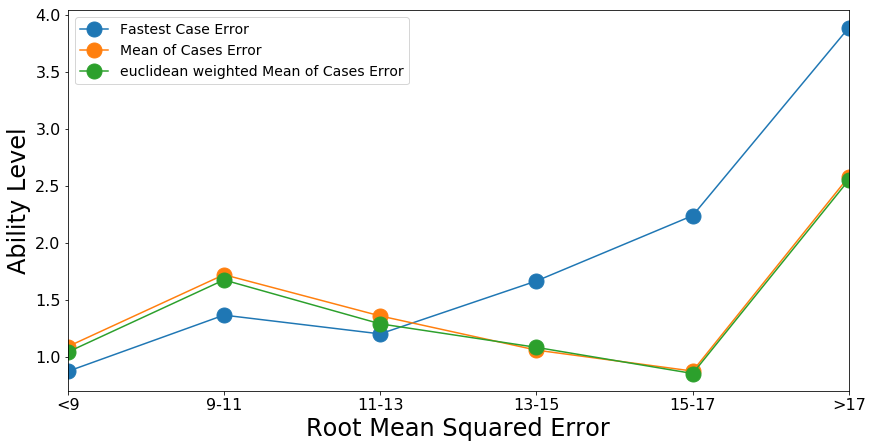

In [189]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra4 = pd.DataFrame({'Mean of Cases Error': mean2, 'Fastest Case Error': best2, 'euclidean weighted Mean of Cases Error': euc2}, index=index)
ax = gra4.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Ability Level', fontsize = 24)
ax.set_xlabel('Root Mean Squared Error', fontsize = 24)
ax.legend(fontsize = 14)

# Male Ability

In [190]:
maleg9 = male[(male.query_pb <= 9)]
maleg11 = male[(male.query_pb > 9) & (male.query_pb <= 11)]
maleg13 = male[(male.query_pb > 11) & (male.query_pb <= 13)]
maleg15 = male[(male.query_pb > 13) & (male.query_pb <= 15)]
maleg17 = male[(male.query_pb > 15) & (male.query_pb <= 17)]
maleg19 = male[(male.query_pb > 17)]

## Bin counts

In [191]:
maleg9count = maleg9.shape[0]
maleg11count = maleg11.shape[0]
maleg13count = maleg13.shape[0]
maleg15count = maleg15.shape[0]
maleg17count = maleg17.shape[0]
maleg19count = maleg19.shape[0]

In [192]:
print(maleg9count) 
print(maleg11count )
print(maleg13count)
print(maleg15count) 
print(maleg17count) 
print(maleg19count) 

74
151
309
468
444
73


In [193]:
count1 = [maleg9count, maleg11count, maleg13count, maleg15count, maleg17count, maleg19count]

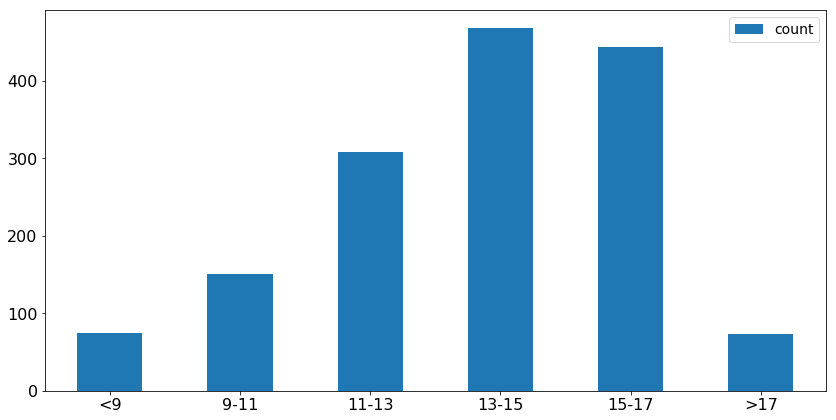

In [194]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra8 = pd.DataFrame({'count': count1}, index=index)
ax = gra8.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [195]:


maleg9B = sqrt(mean_squared_error(maleg9.query_pb, maleg9.best_pb_prediction))
maleg9M = sqrt(mean_squared_error(maleg9.query_pb, maleg9.mean_pb_average_pace))

maleg11B = sqrt(mean_squared_error(maleg11.query_pb, maleg11.best_pb_prediction))
maleg11M = sqrt(mean_squared_error(maleg11.query_pb, maleg11.mean_pb_average_pace))

maleg13B = sqrt(mean_squared_error(maleg13.query_pb, maleg13.best_pb_prediction))
maleg13M = sqrt(mean_squared_error(maleg13.query_pb, maleg13.mean_pb_average_pace))

maleg15B = sqrt(mean_squared_error(maleg15.query_pb, maleg15.best_pb_prediction))
maleg15M = sqrt(mean_squared_error(maleg15.query_pb, maleg15.mean_pb_average_pace))

maleg17B = sqrt(mean_squared_error(maleg17.query_pb, maleg17.best_pb_prediction))
maleg17M = sqrt(mean_squared_error(maleg17.query_pb, maleg17.mean_pb_average_pace))

maleg19B = sqrt(mean_squared_error(maleg19.query_pb, maleg19.best_pb_prediction))
maleg19M = sqrt(mean_squared_error(maleg19.query_pb, maleg19.mean_pb_average_pace))

maleg9W = sqrt(mean_squared_error(maleg9.query_pb, maleg9.weighted_mean))
maleg9E = sqrt(mean_squared_error(maleg9.query_pb, maleg9.euc_weighted_mean))

maleg11W = sqrt(mean_squared_error(maleg11.query_pb, maleg11.weighted_mean))
maleg11E = sqrt(mean_squared_error(maleg11.query_pb, maleg11.euc_weighted_mean))

maleg13W = sqrt(mean_squared_error(maleg13.query_pb, maleg13.weighted_mean))
maleg13E = sqrt(mean_squared_error(maleg13.query_pb, maleg13.euc_weighted_mean))

maleg15W = sqrt(mean_squared_error(maleg15.query_pb, maleg15.weighted_mean))
maleg15E = sqrt(mean_squared_error(maleg15.query_pb, maleg15.euc_weighted_mean))

maleg17W = sqrt(mean_squared_error(maleg17.query_pb, maleg17.weighted_mean))
maleg17E = sqrt(mean_squared_error(maleg17.query_pb, maleg17.euc_weighted_mean))

maleg19W = sqrt(mean_squared_error(maleg19.query_pb, maleg19.weighted_mean))
maleg19E = sqrt(mean_squared_error(maleg19.query_pb, maleg19.euc_weighted_mean))


print('Male U9 Fastest Case Error:', maleg9B)
print('Male U9 Mean of Cases Error:', maleg9M)
print('Male 9-11 Fastest Case Error:', maleg11B)
print('Male 9-11 Mean of Cases Error:', maleg11M)
print('Male 11-13 Fastest Case Error:', maleg13B)
print('Male 11-13 Mean of Cases Error:', maleg13M)
print('Male 13-15 Fastest Case Error:', maleg15B)
print('Male 13-15 Mean of Cases Error:', maleg15M)
print('Male 15-17 Fastest Case Error:', maleg17B)
print('Male 15-17 Mean of Cases Error:', maleg17M)
print('Male O17 Fastest Case Error:', maleg19B)
print('Male 017 Mean of Cases Error:', maleg19M)

Male U9 Fastest Case Error: 0.8861098220620798
Male U9 Mean of Cases Error: 1.102525392388951
Male 9-11 Fastest Case Error: 1.4320241975583972
Male 9-11 Mean of Cases Error: 1.793950746275029
Male 11-13 Fastest Case Error: 1.197249140291887
Male 11-13 Mean of Cases Error: 1.3508827907719225
Male 13-15 Fastest Case Error: 1.5758179551726135
Male 13-15 Mean of Cases Error: 1.073728871105488
Male 15-17 Fastest Case Error: 2.267118239778455
Male 15-17 Mean of Cases Error: 0.8852391778393396
Male O17 Fastest Case Error: 3.9195692154459203
Male 017 Mean of Cases Error: 2.6119609367551515


###  Percentage

In [196]:
mgb9_per = ((maleg9.pb_error / maleg9.query_pb) * 100).mean()
mgm9_per = ((maleg9.mean_error / maleg9.query_pb) * 100).mean()

mgb11_per = ((maleg11.pb_error / maleg11.query_pb) * 100).mean()
mgm11_per = ((maleg11.mean_error / maleg11.query_pb) * 100).mean()

mgb13_per = ((maleg13.pb_error / maleg13.query_pb) * 100).mean()
mgm13_per = ((maleg13.mean_error / maleg13.query_pb) * 100).mean()

mgb15_per = ((maleg15.pb_error / maleg15.query_pb) * 100).mean()
mgm15_per = ((maleg15.mean_error / maleg15.query_pb) * 100).mean()

mgb17_per = ((maleg17.pb_error / maleg17.query_pb) * 100).mean()
mgm17_per = ((maleg17.mean_error / maleg17.query_pb) * 100).mean()

mgb19_per = ((maleg19.pb_error / maleg19.query_pb) * 100).mean()
mgm19_per = ((maleg19.mean_error / maleg19.query_pb) * 100).mean()

print(mgb9_per)
print(mgm9_per)
print(mgb11_per)
print(mgm11_per)
print(mgb13_per)
print(mgm13_per)
print(mgb15_per)
print(mgm15_per)
print(mgb17_per)
print(mgm17_per)
print(mgb19_per)
print(mgm19_per)

6.034754363834653
7.825295171862624
9.740037446401535
11.889625664434497
7.837195087290559
8.146577266585519
9.059546215055562
6.386742272829226
11.600756575463095
4.198757781049093
18.83714635044506
11.982365632463946


In [197]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
wei3 = [maleg9W, maleg11W, maleg13W, maleg15W, maleg17W, maleg19W]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

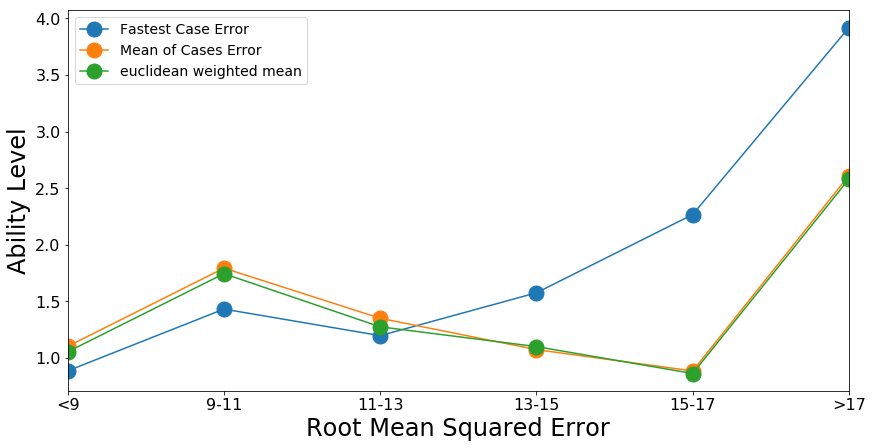

In [198]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'Mean of Cases Error': mean3, 'Fastest Case Error': best3,  'euclidean weighted mean': euc3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Ability Level', fontsize = 24)
ax.set_xlabel('Root Mean Squared Error', fontsize = 24)
ax.legend(fontsize = 14)

# Female Ability

In [199]:
femaleg9 = female[(female.query_pb <= 9)]
femaleg11 = female[(female.query_pb > 9) & (female.query_pb <= 11)]
femaleg13 = female[(female.query_pb > 11) & (female.query_pb <= 13)]
femaleg15 = female[(female.query_pb > 13) & (female.query_pb <= 15)]
femaleg17 = female[(female.query_pb > 15) & (female.query_pb <= 17)]
femaleg19 = female[(female.query_pb > 17)]

## Bin counts

In [200]:
femaleg9count = femaleg9.shape[0]
femaleg11count = femaleg11.shape[0]
femaleg13count = femaleg13.shape[0]
femaleg15count = femaleg15.shape[0]
femaleg17count = femaleg17.shape[0]
femaleg19count = femaleg19.shape[0]

In [201]:
print(femaleg9count) 
print(femaleg11count )
print(femaleg13count)
print(femaleg15count) 
print(femaleg17count) 
print(femaleg19count) 

3
23
14
40
33
4


In [202]:
count1 = [femaleg9count, femaleg11count, femaleg13count, femaleg15count, femaleg17count, femaleg19count]

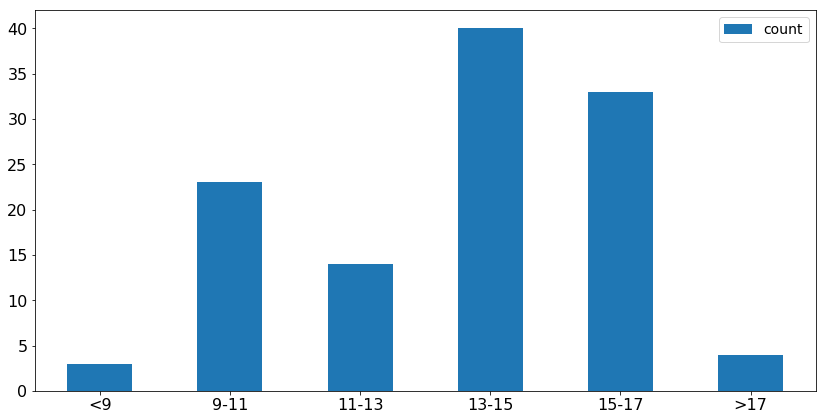

In [203]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'count': count1}, index=index)
ax = gra9.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [204]:

femaleg9B = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.best_pb_prediction))
femaleg9M = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.mean_pb_average_pace))

femaleg11B = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.best_pb_prediction))
femaleg11M = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.mean_pb_average_pace))

femaleg13B = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.best_pb_prediction))
femaleg13M = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.mean_pb_average_pace))

femaleg15B = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.best_pb_prediction))
femaleg15M = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.mean_pb_average_pace))

femaleg17B = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.best_pb_prediction))
femaleg17M = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.mean_pb_average_pace))

femaleg19B = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.best_pb_prediction))
femaleg19M = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.mean_pb_average_pace))

femaleg9W = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.weighted_mean))
femaleg9E = sqrt(mean_squared_error(femaleg9.query_pb, femaleg9.euc_weighted_mean))

femaleg11W = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.weighted_mean))
femaleg11E = sqrt(mean_squared_error(femaleg11.query_pb, femaleg11.euc_weighted_mean))

femaleg13W = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.weighted_mean))
femaleg13E = sqrt(mean_squared_error(femaleg13.query_pb, femaleg13.euc_weighted_mean))

femaleg15W = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.weighted_mean))
femaleg15E = sqrt(mean_squared_error(femaleg15.query_pb, femaleg15.euc_weighted_mean))

femaleg17W = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.weighted_mean))
femaleg17E = sqrt(mean_squared_error(femaleg17.query_pb, femaleg17.euc_weighted_mean))

femaleg19W = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.weighted_mean))
femaleg19E = sqrt(mean_squared_error(femaleg19.query_pb, femaleg19.euc_weighted_mean))


print('female U9 Fastest Case Error:', femaleg9B)
print('female U9 Mean of Cases Error:', femaleg9M)
print('female 9-11 Fastest Case Error:', femaleg11B)
print('female 9-11 Mean of Cases Error:', femaleg11M)
print('female 11-13 Fastest Case Error:', femaleg13B)
print('female 11-13 Mean of Cases Error:', femaleg13M)
print('female 13-15 Fastest Case Error:', femaleg15B)
print('female 13-15 Mean of Cases Error:', femaleg15M)
print('female 15-17 Fastest Case Error:', femaleg17B)
print('female 15-17 Mean of Cases Error:', femaleg17M)
print('female O17 Fastest Case Error:', femaleg19B)
print('female 017 Mean of Cases Error:', femaleg19M)

female U9 Fastest Case Error: 0.3204730020566582
female U9 Mean of Cases Error: 0.6442992900311847
female 9-11 Fastest Case Error: 0.7968153297003446
female 9-11 Mean of Cases Error: 1.12146464272057
female 11-13 Fastest Case Error: 1.2668518368722743
female 11-13 Mean of Cases Error: 1.5082913923038812
female 13-15 Fastest Case Error: 2.4788464931627514
female 13-15 Mean of Cases Error: 0.8493841628580158
female 15-17 Fastest Case Error: 1.8140400188297137
female 15-17 Mean of Cases Error: 0.7023216042937184
female O17 Fastest Case Error: 3.2956897536471743
female 017 Mean of Cases Error: 1.9466816081777085


In [205]:
fgb9_per = ((femaleg9.pb_error / femaleg9.query_pb) * 100).mean()
fgm9_per = ((femaleg9.mean_error / femaleg9.query_pb) * 100).mean()

fgb11_per = ((femaleg11.pb_error / femaleg11.query_pb) * 100).mean()
fgm11_per = ((femaleg11.mean_error / femaleg11.query_pb) * 100).mean()

fgb13_per = ((femaleg13.pb_error / femaleg13.query_pb) * 100).mean()
fgm13_per = ((femaleg13.mean_error / femaleg13.query_pb) * 100).mean()

fgb15_per = ((femaleg15.pb_error / femaleg15.query_pb) * 100).mean()
fgm15_per = ((femaleg15.mean_error / femaleg15.query_pb) * 100).mean()

fgb17_per = ((femaleg17.pb_error / femaleg17.query_pb) * 100).mean()
fgm17_per = ((femaleg17.mean_error / femaleg17.query_pb) * 100).mean()

fgb19_per = ((femaleg19.pb_error / femaleg19.query_pb) * 100).mean()
fgm19_per = ((femaleg19.mean_error / femaleg19.query_pb) * 100).mean()

print(fgb9_per)
print(fgm9_per)
print(fgb11_per)
print(fgm11_per)
print(fgb13_per)
print(fgm13_per)
print(fgb15_per)
print(fgm15_per)
print(fgb17_per)
print(fgm17_per)
print(fgb19_per)
print(fgm19_per)

3.2696569806327367
7.16507970824042
4.565803616796477
6.322882986982882
8.458490449194729
9.060733338010552
14.640835445403443
5.009744740990039
8.436200955324594
3.311081902118188
17.782813228714065
10.913949497224523


In [206]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
wei4 = [femaleg9W, femaleg11W, femaleg13W, femaleg15W, femaleg17W, femaleg19W]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

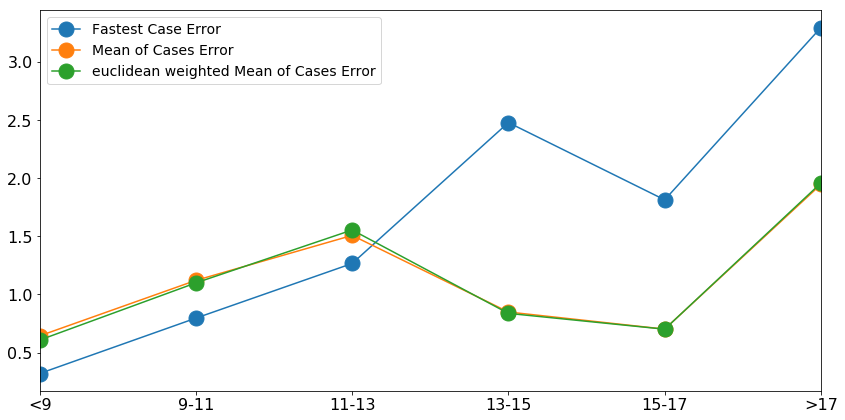

In [207]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'Mean of Cases Error': mean4, 'Fastest Case Error': best4, 'euclidean weighted Mean of Cases Error': euc4}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

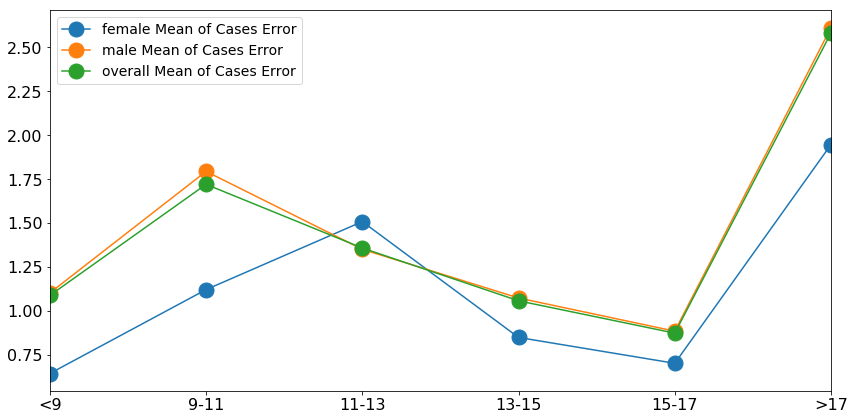

In [208]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra6 = pd.DataFrame({'female Mean of Cases Error': mean4, 'male Mean of Cases Error': mean3, 'overall Mean of Cases Error': mean2}, index=index)
ax = gra6.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

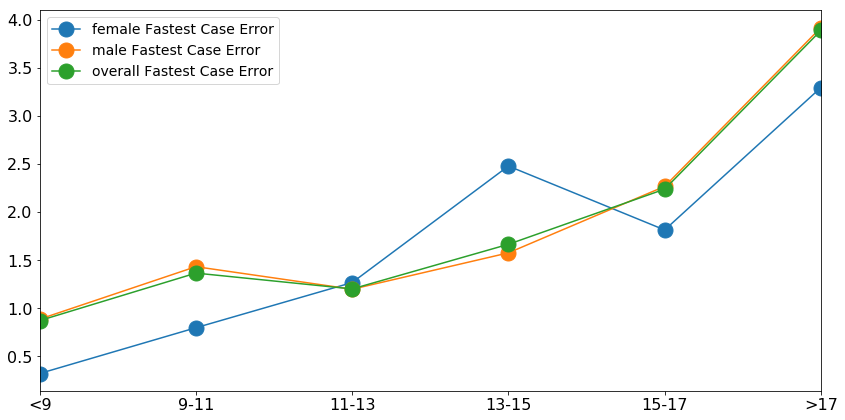

In [209]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra10 = pd.DataFrame({'female Fastest Case Error': best4, 'male Fastest Case Error': best3, 'overall Fastest Case Error': best2}, index=index)
ax = gra10.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# Males vs Females

In [210]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

In [211]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

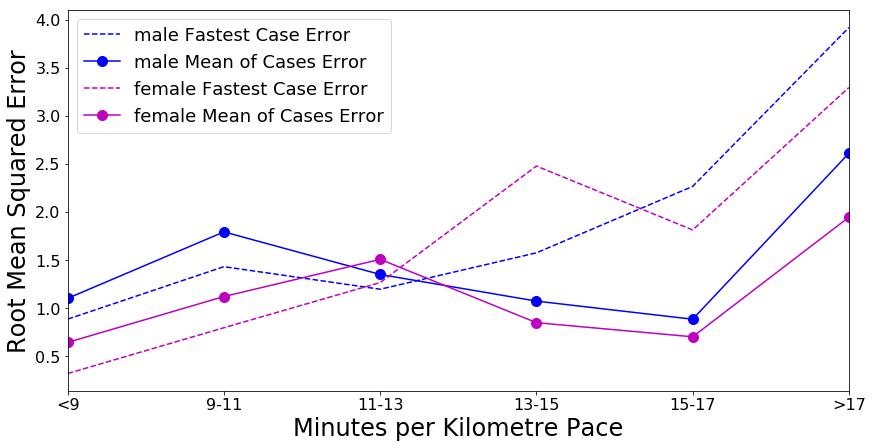

In [212]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male Mean of Cases Error': mean3, 'male Fastest Case Error': best3}, index=index)
gra15 = pd.DataFrame({'female Mean of Cases Error': mean4, 'female Fastest Case Error': best4}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra5.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
gra15.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Minutes per Kilometre Pace', fontsize = 24)
ax.legend(fontsize = 18)
#testdataframe2.plot(style=styles2, ax=ax)

In [213]:
mean8 = [fgm9_per, fgm11_per, fgm13_per, fgm15_per, fgm17_per, fgm19_per]
best8 = [fgb9_per, fgb11_per, fgb13_per, fgb15_per, fgb17_per, fgb19_per]

In [214]:
mean9 = [mgm9_per, mgm11_per, mgm13_per, mgm15_per, mgm17_per, mgm19_per]
best9 = [mgb9_per, mgb11_per, mgb13_per, mgb15_per, mgb17_per, mgb19_per]

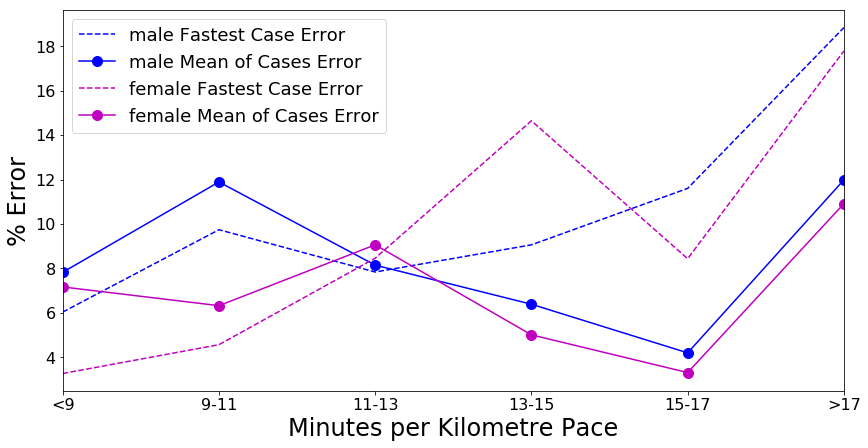

In [215]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra9 = pd.DataFrame({'male Mean of Cases Error': mean9, 'male Fastest Case Error': best9}, index=index)
gra8 = pd.DataFrame({'female Mean of Cases Error': mean8, 'female Fastest Case Error': best8}, index=index)
styles1 = ['b--','bo-']
styles2 = ['m--','mo-']
fig, ax = plt.subplots()
gra9.plot(style=styles1, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
gra8.plot(style=styles2, ax=ax, figsize = (14, 7), fontsize = 16, ms=10)
ax.set_ylabel('% Error', fontsize = 24)
ax.set_xlabel('Minutes per Kilometre Pace', fontsize = 24)
ax.legend(fontsize = 18)
#testdataframe2.plot(style=styles2, ax=ax)

In [216]:
mean4 = [femaleg9M, femaleg11M, femaleg13M, femaleg15M, femaleg17M, femaleg19M]
best4 = [femaleg9B, femaleg11B, femaleg13B, femaleg15B, femaleg17B, femaleg19B]
euc4 = [femaleg9E, femaleg11E, femaleg13E, femaleg15E, femaleg17E, femaleg19E]

In [217]:
mean3 = [maleg9M, maleg11M, maleg13M, maleg15M, maleg17M, maleg19M]
best3 = [maleg9B, maleg11B, maleg13B, maleg15B, maleg17B, maleg19B]
euc3 = [maleg9E, maleg11E, maleg13E, maleg15E, maleg17E, maleg19E]

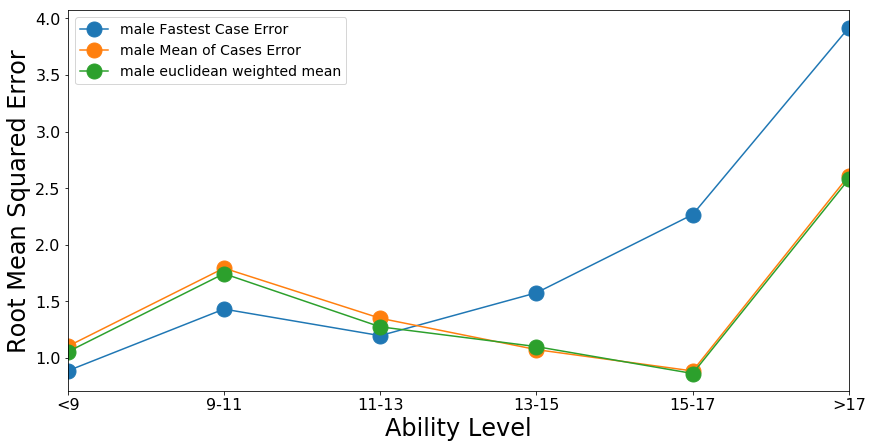

In [218]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male Mean of Cases Error': mean3, 'male Fastest Case Error': best3,  'male euclidean weighted mean': euc3}, index=index)
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 14)

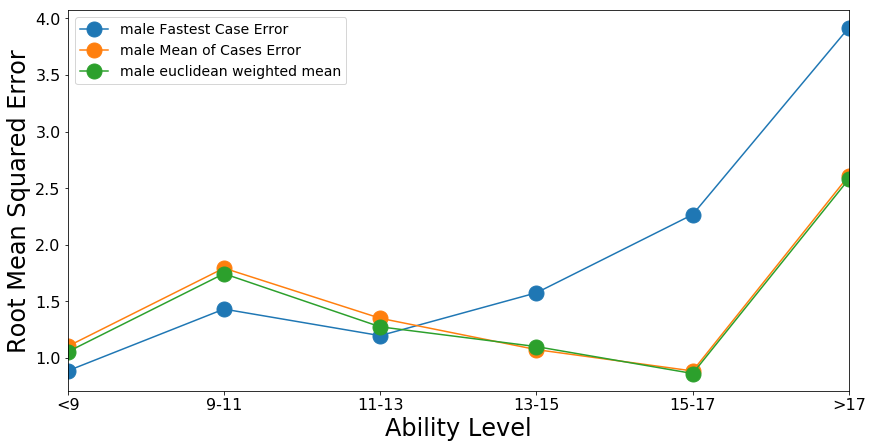

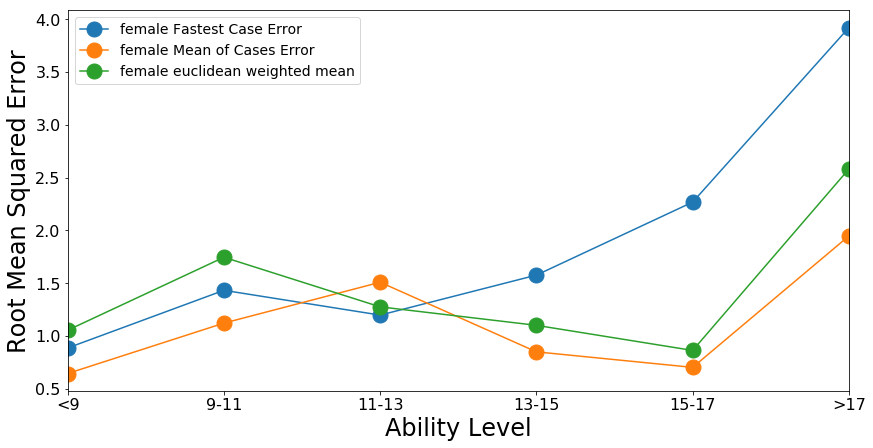

In [219]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra5 = pd.DataFrame({'male Mean of Cases Error': mean3, 'male Fastest Case Error': best3,  'male euclidean weighted mean': euc3}, index=index)
styles = ['bs-','ro-','y^-']
linewidths = [2, 1, 4]
ax = gra5.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax.set_xlabel('Ability Level', fontsize = 24)
ax.legend(fontsize = 14)
gra15 = pd.DataFrame({'female Mean of Cases Error': mean4, 'female Fastest Case Error': best3,  'female euclidean weighted mean': euc3}, index=index)
ax1 = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax1.set_ylabel('Root Mean Squared Error', fontsize = 24)
ax1.set_xlabel('Ability Level', fontsize = 24)
ax1.legend(fontsize = 14)

# Categorical Ability

## Senior Men Ability

In [220]:
sg9 = sen[(sen.query_pb <= 9)]
sg11 = sen[(sen.query_pb > 9) & (sen.query_pb <= 11)]
sg13 = sen[(sen.query_pb > 11) & (sen.query_pb <= 13)]
sg15 = sen[(sen.query_pb > 13) & (sen.query_pb <= 15)]
sg17 = sen[(sen.query_pb > 15) & (sen.query_pb <= 17)]
sg19 = sen[(sen.query_pb > 17)]

### Bin counts

In [221]:
sg9count = sg9.shape[0]
sg11count = sg11.shape[0]
sg13count = sg13.shape[0]
sg15count = sg15.shape[0]
sg17count = sg17.shape[0]
sg19count = sg19.shape[0]

In [222]:
count2 = [sg9count, sg11count, sg13count, sg15count, sg17count, sg19count]

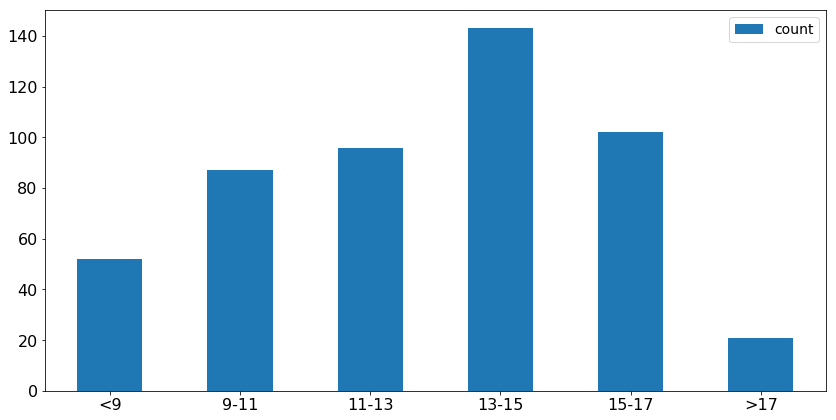

In [223]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count2}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [224]:


sg9B = sqrt(mean_squared_error(sg9.query_pb, sg9.best_pb_prediction))
sg9M = sqrt(mean_squared_error(sg9.query_pb, sg9.mean_pb_average_pace))

sg11B = sqrt(mean_squared_error(sg11.query_pb, sg11.best_pb_prediction))
sg11M = sqrt(mean_squared_error(sg11.query_pb, sg11.mean_pb_average_pace))

sg13B = sqrt(mean_squared_error(sg13.query_pb, sg13.best_pb_prediction))
sg13M = sqrt(mean_squared_error(sg13.query_pb, sg13.mean_pb_average_pace))

sg15B = sqrt(mean_squared_error(sg15.query_pb, sg15.best_pb_prediction))
sg15M = sqrt(mean_squared_error(sg15.query_pb, sg15.mean_pb_average_pace))

sg17B = sqrt(mean_squared_error(sg17.query_pb, sg17.best_pb_prediction))
sg17M = sqrt(mean_squared_error(sg17.query_pb, sg17.mean_pb_average_pace))

sg19B = sqrt(mean_squared_error(sg19.query_pb, sg19.best_pb_prediction))
sg19M = sqrt(mean_squared_error(sg19.query_pb, sg19.mean_pb_average_pace))


print('Sen U9 Fastest Case Error:', sg9B)
print('Sen U9 Mean of Cases Error:', sg9M)
print('Sen 9-11 Fastest Case Error:', sg11B)
print('Sen 9-11 Mean of Cases Error:', sg11M)
print('Sen 11-13 Fastest Case Error:', sg13B)
print('Sen 11-13 Mean of Cases Error:', sg13M)
print('Sen 13-15 Fastest Case Error:', sg15B)
print('Sen 13-15 Mean of Cases Error:', sg15M)
print('Sen 15-17 Fastest Case Error:', sg17B)
print('Sen 15-17 Mean of Cases Error:', sg17M)
print('Sen O17 Fastest Case Error:', sg19B)
print('Sen 017 Mean of Cases Error:', sg19M)

Sen U9 Fastest Case Error: 1.002163050813176
Sen U9 Mean of Cases Error: 1.2543527583694363
Sen 9-11 Fastest Case Error: 1.6443089020573922
Sen 9-11 Mean of Cases Error: 1.9909192670870437
Sen 11-13 Fastest Case Error: 1.342164194055753
Sen 11-13 Mean of Cases Error: 1.524877613784226
Sen 13-15 Fastest Case Error: 1.6604378571493923
Sen 13-15 Mean of Cases Error: 1.1703376456027093
Sen 15-17 Fastest Case Error: 2.3202131152688716
Sen 15-17 Mean of Cases Error: 0.9140285045850222
Sen O17 Fastest Case Error: 3.3489808005407267
Sen 017 Mean of Cases Error: 2.105597001181468


In [225]:
mean5 = [sg9M, sg11M, sg13M, sg15M, sg17M, sg19M]
best5 = [sg9B, sg11B, sg13B, sg15B, sg17B, sg19B]

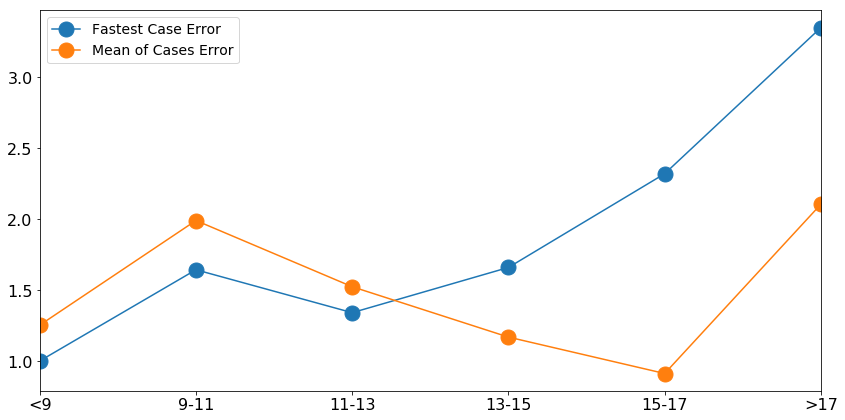

In [226]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra12 = pd.DataFrame({'Mean of Cases Error': mean5, 'Fastest Case Error': best5}, index=index)
ax = gra12.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 1 Ability

In [227]:
mg9 = mas[(mas.query_pb <= 9)]
mg11 = mas[(mas.query_pb > 9) & (mas.query_pb <= 11)]
mg13 = mas[(mas.query_pb > 11) & (mas.query_pb <= 13)]
mg15 = mas[(mas.query_pb > 13) & (mas.query_pb <= 15)]
mg17 = mas[(mas.query_pb > 15) & (mas.query_pb <= 17)]
mg19 = mas[(mas.query_pb > 17)]

### Bin counts

In [228]:
mg9count = mg9.shape[0]
mg11count = mg11.shape[0]
mg13count = mg13.shape[0]
mg15count = mg15.shape[0]
mg17count = mg17.shape[0]
mg19count = mg19.shape[0]

In [229]:
count3 = [mg9count, mg11count, mg13count, mg15count, mg17count, mg19count]

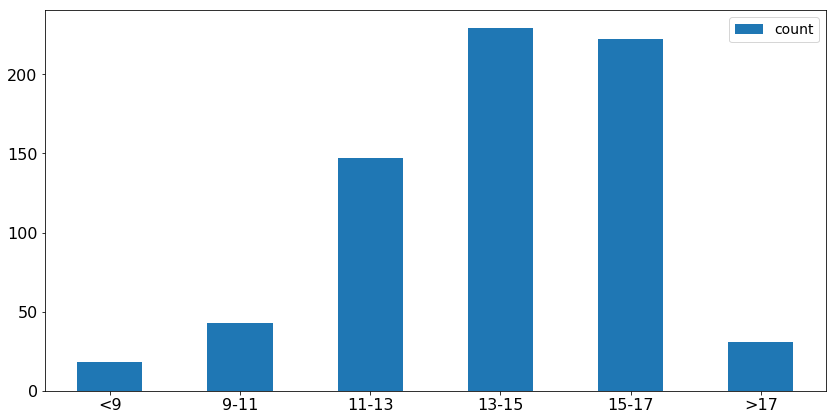

In [230]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [231]:


mg9B = sqrt(mean_squared_error(mg9.query_pb, mg9.best_pb_prediction))
mg9M = sqrt(mean_squared_error(mg9.query_pb, mg9.mean_pb_average_pace))

mg11B = sqrt(mean_squared_error(mg11.query_pb, mg11.best_pb_prediction))
mg11M = sqrt(mean_squared_error(mg11.query_pb, mg11.mean_pb_average_pace))

mg13B = sqrt(mean_squared_error(mg13.query_pb, mg13.best_pb_prediction))
mg13M = sqrt(mean_squared_error(mg13.query_pb, mg13.mean_pb_average_pace))

mg15B = sqrt(mean_squared_error(mg15.query_pb, mg15.best_pb_prediction))
mg15M = sqrt(mean_squared_error(mg15.query_pb, mg15.mean_pb_average_pace))

mg17B = sqrt(mean_squared_error(mg17.query_pb, mg17.best_pb_prediction))
mg17M = sqrt(mean_squared_error(mg17.query_pb, mg17.mean_pb_average_pace))

mg19B = sqrt(mean_squared_error(mg19.query_pb, mg19.best_pb_prediction))
mg19M = sqrt(mean_squared_error(mg19.query_pb, mg19.mean_pb_average_pace))


print('Mas U9 Fastest Case Error:', mg9B)
print('Mas U9 Mean of Cases Error:', mg9M)
print('Mas 9-11 Fastest Case Error:', mg11B)
print('Mas 9-11 Mean of Cases Error:', mg11M)
print('Mas 11-13 Fastest Case Error:', mg13B)
print('Mas 11-13 Mean of Cases Error:', mg13M)
print('Mas 13-15 Fastest Case Error:', mg15B)
print('Mas 13-15 Mean of Cases Error:', mg15M)
print('Mas 15-17 Fastest Case Error:', mg17B)
print('Mas 15-17 Mean of Cases Error:', mg17M)
print('Mas O17 Fastest Case Error:', mg19B)
print('Mas 017 Mean of Cases Error:', mg19M)

Mas U9 Fastest Case Error: 0.551167433404901
Mas U9 Mean of Cases Error: 0.6006127403344209
Mas 9-11 Fastest Case Error: 1.0910532066353602
Mas 9-11 Mean of Cases Error: 1.3205253911804353
Mas 11-13 Fastest Case Error: 1.1562359237129374
Mas 11-13 Mean of Cases Error: 1.249276865053888
Mas 13-15 Fastest Case Error: 1.516256512374808
Mas 13-15 Mean of Cases Error: 1.0509381881361404
Mas 15-17 Fastest Case Error: 2.304313955645504
Mas 15-17 Mean of Cases Error: 0.87999796876636
Mas O17 Fastest Case Error: 3.6810474942726357
Mas 017 Mean of Cases Error: 2.3088524258273484


In [232]:
mean6 = [mg9M, mg11M, mg13M, mg15M, mg17M, mg19M]
best6 = [mg9B, mg11B, mg13B, mg15B, mg17B, mg19B]

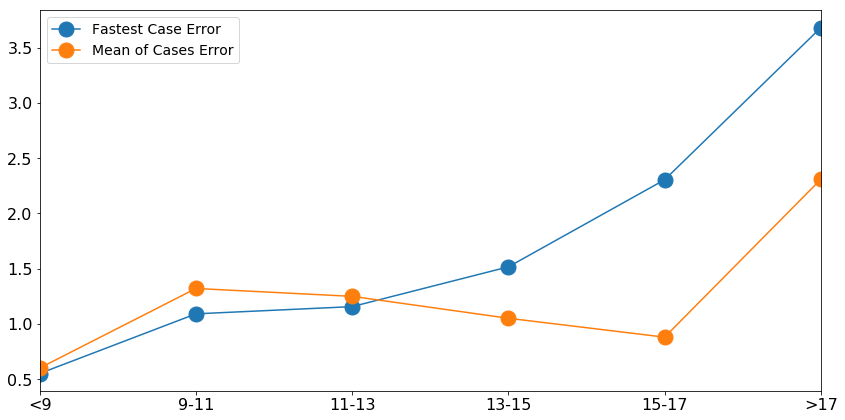

In [233]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra13 = pd.DataFrame({'Mean of Cases Error': mean6, 'Fastest Case Error': best6}, index=index)
ax = gra13.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 2 Ability

In [234]:
m2g9 = mas2[(mas2.query_pb <= 9)]
m2g11 = mas2[(mas2.query_pb > 9) & (mas2.query_pb <= 11)]
m2g13 = mas2[(mas2.query_pb > 11) & (mas2.query_pb <= 13)]
m2g15 = mas2[(mas2.query_pb > 13) & (mas2.query_pb <= 15)]
m2g17 = mas2[(mas2.query_pb > 15) & (mas2.query_pb <= 17)]
m2g19 = mas2[(mas2.query_pb > 17)]

### Bin counts

In [235]:
m2g9count = m2g9.shape[0]
m2g11count = m2g11.shape[0]
m2g13count = m2g13.shape[0]
m2g15count = m2g15.shape[0]
m2g17count = m2g17.shape[0]
m2g19count = m2g19.shape[0]

In [236]:
count3 = [m2g9count, m2g11count, m2g13count, m2g15count, m2g17count, m2g19count]

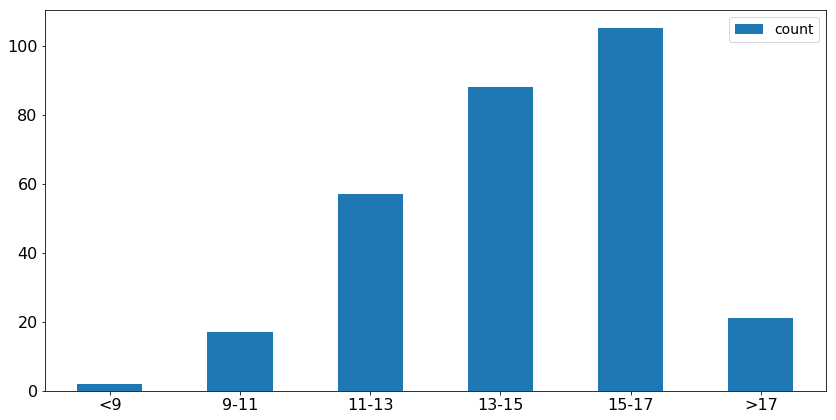

In [237]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count3}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [238]:

m2g9B = sqrt(mean_squared_error(m2g9.query_pb, m2g9.best_pb_prediction))
m2g9M = sqrt(mean_squared_error(m2g9.query_pb, m2g9.mean_pb_average_pace))

m2g11B = sqrt(mean_squared_error(m2g11.query_pb, m2g11.best_pb_prediction))
m2g11M = sqrt(mean_squared_error(m2g11.query_pb, m2g11.mean_pb_average_pace))

m2g13B = sqrt(mean_squared_error(m2g13.query_pb, m2g13.best_pb_prediction))
m2g13M = sqrt(mean_squared_error(m2g13.query_pb, m2g13.mean_pb_average_pace))

m2g15B = sqrt(mean_squared_error(m2g15.query_pb, m2g15.best_pb_prediction))
m2g15M = sqrt(mean_squared_error(m2g15.query_pb, m2g15.mean_pb_average_pace))

m2g17B = sqrt(mean_squared_error(m2g17.query_pb, m2g17.best_pb_prediction))
m2g17M = sqrt(mean_squared_error(m2g17.query_pb, m2g17.mean_pb_average_pace))

m2g19B = sqrt(mean_squared_error(m2g19.query_pb, m2g19.best_pb_prediction))
m2g19M = sqrt(mean_squared_error(m2g19.query_pb, m2g19.mean_pb_average_pace))


print('Mas2 U9 Fastest Case Error:', m2g9B)
print('Mas2 U9 Mean of Cases Error:', m2g9M)
print('Mas2 9-11 Fastest Case Error:', m2g11B)
print('Mas2 9-11 Mean of Cases Error:', m2g11M)
print('Mas2 11-13 Fastest Case Error:', m2g13B)
print('Mas2 11-13 Mean of Cases Error:', m2g13M)
print('Mas2 13-15 Fastest Case Error:', m2g15B)
print('Mas2 13-15 Mean of Cases Error:', m2g15M)
print('Mas2 15-17 Fastest Case Error:', m2g17B)
print('Mas2 15-17 Mean of Cases Error:', m2g17M)
print('Mas2 O17 Fastest Case Error:', m2g19B)
print('Mas2 017 Mean of Cases Error:', m2g19M)

Mas2 U9 Fastest Case Error: 0.16528380511442217
Mas2 U9 Mean of Cases Error: 0.1828880933995543
Mas2 9-11 Fastest Case Error: 0.809081384510866
Mas2 9-11 Mean of Cases Error: 1.4680295529045109
Mas2 11-13 Fastest Case Error: 1.0654976743962878
Mas2 11-13 Mean of Cases Error: 1.3738881550852258
Mas2 13-15 Fastest Case Error: 1.6045081720471814
Mas2 13-15 Mean of Cases Error: 0.9968160364703891
Mas2 15-17 Fastest Case Error: 2.161329736220008
Mas2 15-17 Mean of Cases Error: 0.8881905888286705
Mas2 O17 Fastest Case Error: 4.710262939647716
Mas2 017 Mean of Cases Error: 3.37830414384029


In [239]:
mean7 = [m2g9M, m2g11M, m2g13M, m2g15M, m2g17M, m2g19M]
best7 = [m2g9B, m2g11B, m2g13B, m2g15B, m2g17B, m2g19B]

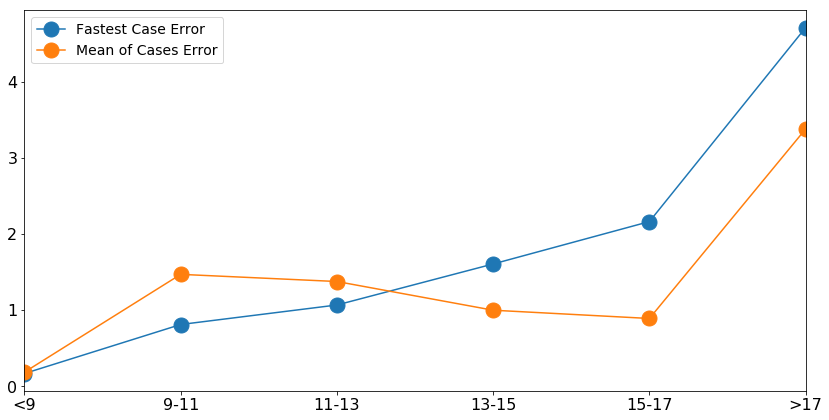

In [240]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra14 = pd.DataFrame({'Mean of Cases Error': mean7, 'Fastest Case Error': best7}, index=index)
ax = gra14.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Men 3 Ability

In [241]:
m3g9 = mas3[(mas3.query_pb <= 9)]
m3g11 = mas3[(mas3.query_pb > 9) & (mas3.query_pb <= 11)]
m3g13 = mas3[(mas3.query_pb > 11) & (mas3.query_pb <= 13)]
m3g15 = mas3[(mas3.query_pb > 13) & (mas3.query_pb <= 15)]
m3g17 = mas3[(mas3.query_pb > 15) & (mas3.query_pb <= 17)]
m3g19 = mas3[(mas3.query_pb > 17)]

### Bin counts

In [242]:
m3g9count = m3g9.shape[0]
m3g11count = m3g11.shape[0]
m3g13count = m3g13.shape[0]
m3g15count = m3g15.shape[0]
m3g17count = m3g17.shape[0]
m3g19count = m3g19.shape[0]

In [243]:
count4 = [m3g9count, m3g11count, m3g13count, m3g15count, m3g17count, m3g19count]

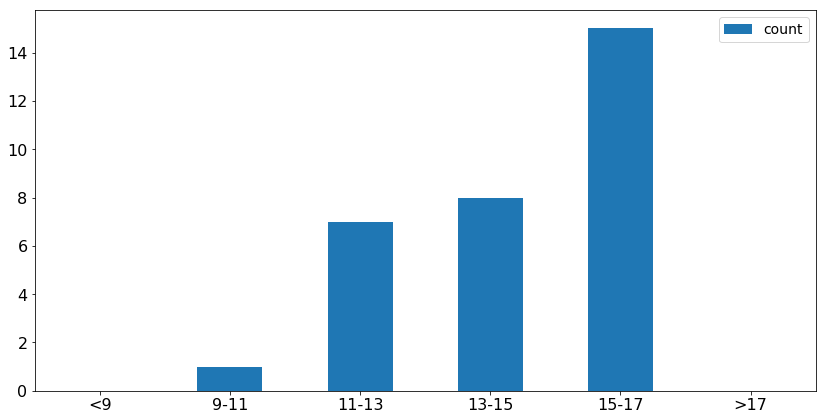

In [244]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count4}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [245]:


#m3g9B = sqrt(mean_squared_error(m3g9.query_pb, m3g9.best_pb_prediction))
#m3g9M = sqrt(mean_squared_error(m3g9.query_pb, m3g9.mean_pb_average_pace))

m3g11B = sqrt(mean_squared_error(m3g11.query_pb, m3g11.best_pb_prediction))
m3g11M = sqrt(mean_squared_error(m3g11.query_pb, m3g11.mean_pb_average_pace))

m3g13B = sqrt(mean_squared_error(m3g13.query_pb, m3g13.best_pb_prediction))
m3g13M = sqrt(mean_squared_error(m3g13.query_pb, m3g13.mean_pb_average_pace))

m3g15B = sqrt(mean_squared_error(m3g15.query_pb, m3g15.best_pb_prediction))
m3g15M = sqrt(mean_squared_error(m3g15.query_pb, m3g15.mean_pb_average_pace))

m3g17B = sqrt(mean_squared_error(m3g17.query_pb, m3g17.best_pb_prediction))
m3g17M = sqrt(mean_squared_error(m3g17.query_pb, m3g17.mean_pb_average_pace))

#m3g19B = sqrt(mean_squared_error(m3g19.query_pb, m3g19.best_pb_prediction))
#m3g19M = sqrt(mean_squared_error(m3g19.query_pb, m3g19.mean_pb_average_pace))


#print('Mas3 U9 Fastest Case Error:', m3g9B)
#print('Mas3 U9 Mean of Cases Error:', m3g9M)
print('Mas3 9-11 Fastest Case Error:', m3g11B)
print('Mas3 9-11 Mean of Cases Error:', m3g11M)
print('Mas3 11-13 Fastest Case Error:', m3g13B)
print('Mas3 11-13 Mean of Cases Error:', m3g13M)
print('Mas3 13-15 Fastest Case Error:', m3g15B)
print('Mas3 13-15 Mean of Cases Error:', m3g15M)
print('Mas3 15-17 Fastest Case Error:', m3g17B)
print('Mas3 15-17 Mean of Cases Error:', m3g17M)
#print('Mas3 O17 Fastest Case Error:', m3g19B)
#print('Mas3 017 Mean of Cases Error:', m3g19M)

Mas3 9-11 Fastest Case Error: 0.8364818326232513
Mas3 9-11 Mean of Cases Error: 0.4514712678094419
Mas3 11-13 Fastest Case Error: 1.0850319231047785
Mas3 11-13 Mean of Cases Error: 0.7078650074931252
Mas3 13-15 Fastest Case Error: 1.3624383305517314
Mas3 13-15 Mean of Cases Error: 0.6446080439297064
Mas3 15-17 Fastest Case Error: 2.0606760285980967
Mas3 15-17 Mean of Cases Error: 0.7291781844410465


In [246]:
mean8 = [m3g11M, m3g13M, m3g15M, m3g17M]
best8 = [m3g11B, m3g13B, m3g15B, m3g17B]

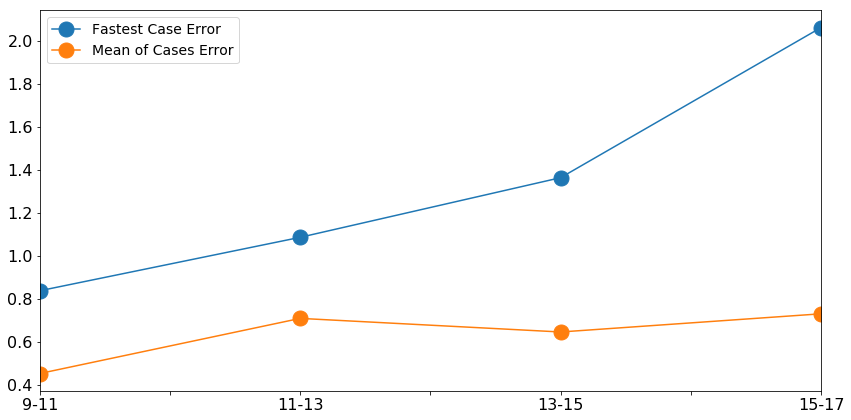

In [247]:
index = ['9-11', '11-13', '13-15', '15-17']
gra15 = pd.DataFrame({'Mean of Cases Error': mean8, 'Fastest Case Error': best8}, index=index)
ax = gra15.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 1 Ability

In [248]:
w1g9 = wom1[(wom1.query_pb <= 9)]
w1g11 = wom1[(wom1.query_pb > 9) & (wom1.query_pb <= 11)]
w1g13 = wom1[(wom1.query_pb > 11) & (wom1.query_pb <= 13)]
w1g15 = wom1[(wom1.query_pb > 13) & (wom1.query_pb <= 15)]
w1g17 = wom1[(wom1.query_pb > 15) & (wom1.query_pb <= 17)]
w1g19 = wom1[(wom1.query_pb > 17)]

### Bin counts

In [249]:
w1g9count = w1g9.shape[0]
w1g11count = w1g11.shape[0]
w1g13count = w1g13.shape[0]
w1g15count = w1g15.shape[0]
w1g17count = w1g17.shape[0]
w1g19count = w1g19.shape[0]

In [250]:
count5 = [w1g9count, w1g11count, w1g13count, w1g15count, w1g17count, w1g19count]

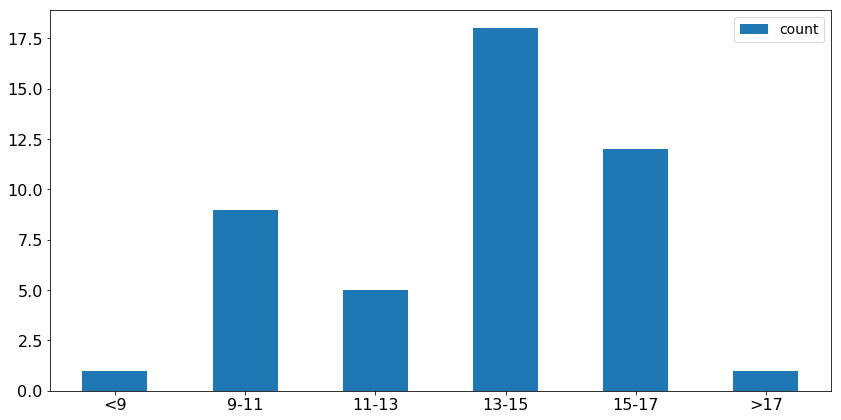

In [251]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count5}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [252]:


w1g9B = sqrt(mean_squared_error(w1g9.query_pb, w1g9.best_pb_prediction))
w1g9M = sqrt(mean_squared_error(w1g9.query_pb, w1g9.mean_pb_average_pace))

w1g11B = sqrt(mean_squared_error(w1g11.query_pb, w1g11.best_pb_prediction))
w1g11M = sqrt(mean_squared_error(w1g11.query_pb, w1g11.mean_pb_average_pace))

w1g13B = sqrt(mean_squared_error(w1g13.query_pb, w1g13.best_pb_prediction))
w1g13M = sqrt(mean_squared_error(w1g13.query_pb, w1g13.mean_pb_average_pace))

w1g15B = sqrt(mean_squared_error(w1g15.query_pb, w1g15.best_pb_prediction))
w1g15M = sqrt(mean_squared_error(w1g15.query_pb, w1g15.mean_pb_average_pace))

w1g17B = sqrt(mean_squared_error(w1g17.query_pb, w1g17.best_pb_prediction))
w1g17M = sqrt(mean_squared_error(w1g17.query_pb, w1g17.mean_pb_average_pace))

w1g19B = sqrt(mean_squared_error(w1g19.query_pb, w1g19.best_pb_prediction))
w1g19M = sqrt(mean_squared_error(w1g19.query_pb, w1g19.mean_pb_average_pace))


print('Wom1 U9 Fastest Case Error:', w1g9B)
print('Wom1 U9 Mean of Cases Error:', w1g9M)
print('Wom1 9-11 Fastest Case Error:', w1g11B)
print('Wom1 9-11 Mean of Cases Error:', w1g11M)
print('Wom1 11-13 Fastest Case Error:', w1g13B)
print('Wom1 11-13 Mean of Cases Error:', w1g13M)
print('Wom1 13-15 Fastest Case Error:', w1g15B)
print('Wom1 13-15 Mean of Cases Error:', w1g15M)
print('Wom1 15-17 Fastest Case Error:', w1g17B)
print('Wom1 15-17 Mean of Cases Error:', w1g17M)
print('Wom1 O17 Fastest Case Error:', w1g19B)
print('Wom1 017 Mean of Cases Error:', w1g19M)

Wom1 U9 Fastest Case Error: 0.45789861606593263
Wom1 U9 Mean of Cases Error: 0.5643811635255069
Wom1 9-11 Fastest Case Error: 0.33961261948635457
Wom1 9-11 Mean of Cases Error: 0.3517948239486675
Wom1 11-13 Fastest Case Error: 1.4750433447478297
Wom1 11-13 Mean of Cases Error: 0.9005701234420691
Wom1 13-15 Fastest Case Error: 2.319060317415525
Wom1 13-15 Mean of Cases Error: 0.8052894981076457
Wom1 15-17 Fastest Case Error: 1.0817084487640451
Wom1 15-17 Mean of Cases Error: 0.5466932238032687
Wom1 O17 Fastest Case Error: 4.771476492890816
Wom1 017 Mean of Cases Error: 2.1541597868674884


In [253]:
mean9 = [w1g9M, w1g11M, w1g13M, w1g15M, w1g17M, w1g19M]
best9 = [w1g9B, w1g11B, w1g13B, w1g15B, w1g17B, w1g19B]

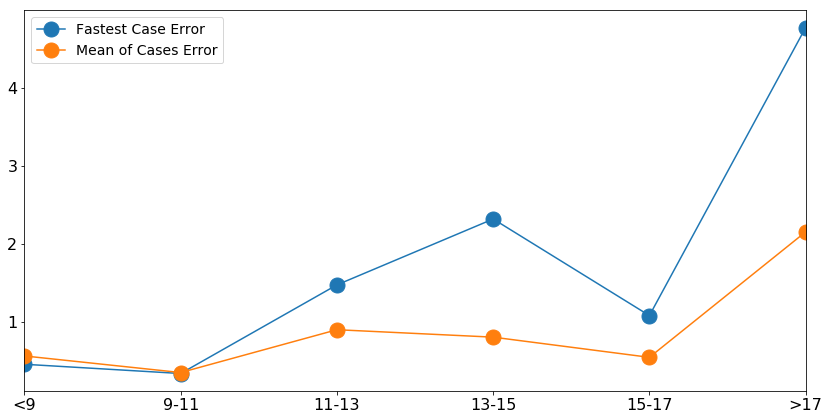

In [254]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra16 = pd.DataFrame({'Mean of Cases Error': mean9, 'Fastest Case Error': best9}, index=index)
ax = gra16.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Masters Women 2 Ability

In [255]:
w2g9 = wom2[(wom2.query_pb <= 9)]
w2g11 = wom2[(wom2.query_pb > 9) & (wom2.query_pb <= 11)]
w2g13 = wom2[(wom2.query_pb > 11) & (wom2.query_pb <= 13)]
w2g15 = wom2[(wom2.query_pb > 13) & (wom2.query_pb <= 15)]
w2g17 = wom2[(wom2.query_pb > 15) & (wom2.query_pb <= 17)]
w2g19 = wom2[(wom2.query_pb > 17)]

### Bin counts

In [256]:
w2g9count = w2g9.shape[0]
w2g11count = w2g11.shape[0]
w2g13count = w2g13.shape[0]
w2g15count = w2g15.shape[0]
w2g17count = w2g17.shape[0]
w2g19count = w2g19.shape[0]

In [257]:
count6 = [w2g9count, w2g11count, w2g13count, w2g15count, w2g17count, w2g19count]

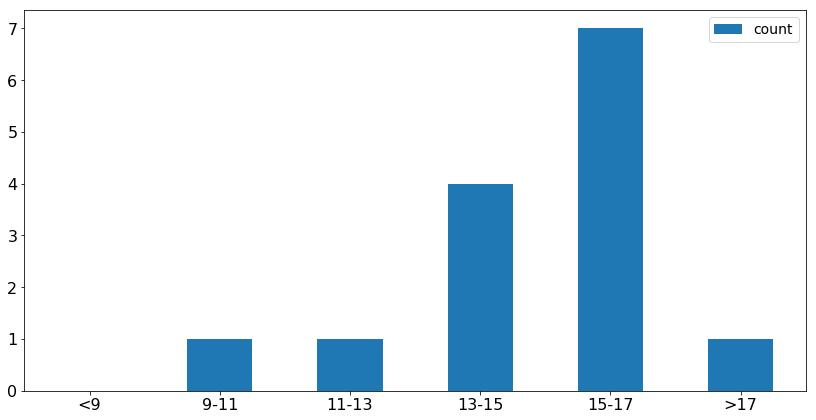

In [258]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count6}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [259]:


#w2g9B = sqrt(mean_squared_error(w2g9.query_pb, w2g9.best_pb_prediction))
#w2g9M = sqrt(mean_squared_error(w2g9.query_pb, w2g9.mean_pb_average_pace))

#w2g11B = sqrt(mean_squared_error(w2g11.query_pb, w2g11.best_pb_prediction))
#w2g11M = sqrt(mean_squared_error(w2g11.query_pb, w2g11.mean_pb_average_pace))

#w2g13B = sqrt(mean_squared_error(w2g13.query_pb, w2g13.best_pb_prediction))
#w2g13M = sqrt(mean_squared_error(w2g13.query_pb, w2g13.mean_pb_average_pace))

w2g15B = sqrt(mean_squared_error(w2g15.query_pb, w2g15.best_pb_prediction))
w2g15M = sqrt(mean_squared_error(w2g15.query_pb, w2g15.mean_pb_average_pace))

w2g17B = sqrt(mean_squared_error(w2g17.query_pb, w2g17.best_pb_prediction))
w2g17M = sqrt(mean_squared_error(w2g17.query_pb, w2g17.mean_pb_average_pace))

w2g19B = sqrt(mean_squared_error(w2g19.query_pb, w2g19.best_pb_prediction))
w2g19M = sqrt(mean_squared_error(w2g19.query_pb, w2g19.mean_pb_average_pace))


#print('Wom2 U9 Fastest Case Error:', w2g9B)
#print('Wom2 U9 Mean of Cases Error:', w2g9M)
#print('Wom2 9-11 Fastest Case Error:', w2g11B)
#print('Wom2 9-11 Mean of Cases Error:', w2g11M)
#print('Wom2 11-13 Fastest Case Error:', w2g13B)
#print('Wom2 11-13 Mean of Cases Error:', w2g13M)
print('Wom2 13-15 Fastest Case Error:', w2g15B)
print('Wom2 13-15 Mean of Cases Error:', w2g15M)
print('Wom2 15-17 Fastest Case Error:', w2g17B)
print('Wom2 15-17 Mean of Cases Error:', w2g17M)
print('Wom2 O17 Fastest Case Error:', w2g19B)
print('Wom2 017 Mean of Cases Error:', w2g19M)

Wom2 13-15 Fastest Case Error: 2.8950607131221715
Wom2 13-15 Mean of Cases Error: 0.5902881150278274
Wom2 15-17 Fastest Case Error: 1.2708374688602482
Wom2 15-17 Mean of Cases Error: 0.634658955471338
Wom2 O17 Fastest Case Error: 2.70683719035406
Wom2 017 Mean of Cases Error: 1.8390975475018312


In [260]:
mean10 = [w2g15M, w2g17M, w2g19M]
best10 = [w2g15B, w2g17B, w2g19B]

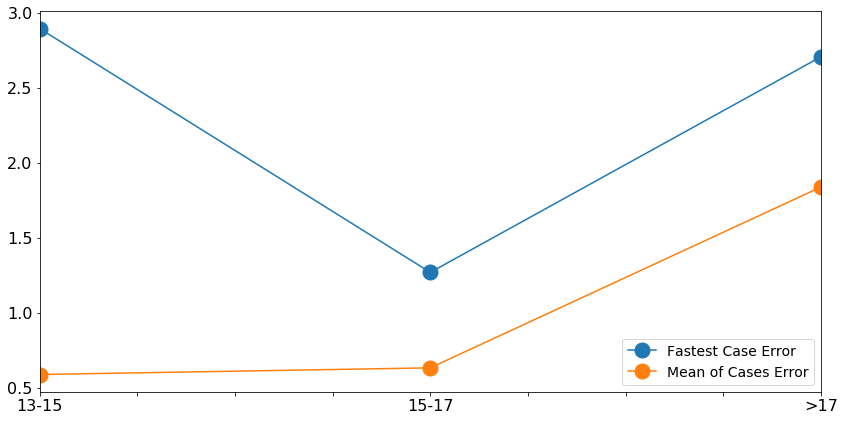

In [261]:
index = ['13-15', '15-17', '>17']
gra18 = pd.DataFrame({'Mean of Cases Error': mean10, 'Fastest Case Error': best10}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Senior Women Ability

In [262]:
sw9 = senW[(senW.query_pb <= 9)]
sw11 = senW[(senW.query_pb > 9) & (senW.query_pb <= 11)]
sw13 = senW[(senW.query_pb > 11) & (senW.query_pb <= 13)]
sw15 = senW[(senW.query_pb > 13) & (senW.query_pb <= 15)]
sw17 = senW[(senW.query_pb > 15) & (senW.query_pb <= 17)]
sw19 = senW[(senW.query_pb > 17)]

### Bin counts

In [263]:
sw9count = sw9.shape[0]
sw11count = sw11.shape[0]
sw13count = sw13.shape[0]
sw15count = sw15.shape[0]
sw17count = sw17.shape[0]
sw19count = sw19.shape[0]

In [264]:
count7 = [sw9count, sw11count, sw13count, sw15count, sw17count, sw19count]

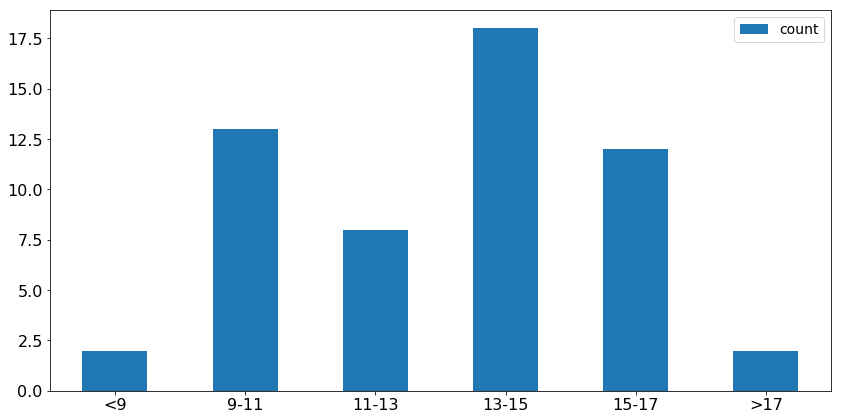

In [265]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count7}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [266]:


sw9B = sqrt(mean_squared_error(sw9.query_pb, sw9.best_pb_prediction))
sw9M = sqrt(mean_squared_error(sw9.query_pb, sw9.mean_pb_average_pace))

sw11B = sqrt(mean_squared_error(sw11.query_pb, sw11.best_pb_prediction))
sw11M = sqrt(mean_squared_error(sw11.query_pb, sw11.mean_pb_average_pace))

sw13B = sqrt(mean_squared_error(sw13.query_pb, sw13.best_pb_prediction))
sw13M = sqrt(mean_squared_error(sw13.query_pb, sw13.mean_pb_average_pace))

sw15B = sqrt(mean_squared_error(sw15.query_pb, sw15.best_pb_prediction))
sw15M = sqrt(mean_squared_error(sw15.query_pb, sw15.mean_pb_average_pace))

sw17B = sqrt(mean_squared_error(sw17.query_pb, sw17.best_pb_prediction))
sw17M = sqrt(mean_squared_error(sw17.query_pb, sw17.mean_pb_average_pace))

sw19B = sqrt(mean_squared_error(sw19.query_pb, sw19.best_pb_prediction))
sw19M = sqrt(mean_squared_error(sw19.query_pb, sw19.mean_pb_average_pace))


print('Senior Women U9 Fastest Case Error:', sw9B)
print('Senior Women U9 Mean of Cases Error:', sw9M)
print('Senior Women 9-11 Fastest Case Error:', sw11B)
print('Senior Women 9-11 Mean of Cases Error:', sw11M)
print('Senior Women 11-13 Fastest Case Error:', sw13B)
print('Senior Women 11-13 Mean of Cases Error:', sw13M)
print('Senior Women 13-15 Fastest Case Error:', sw15B)
print('Senior Women 13-15 Mean of Cases Error:', sw15M)
print('Senior Women 15-17 Fastest Case Error:', sw17B)
print('Senior Women 15-17 Mean of Cases Error:', sw17M)
print('Senior Women O17 Fastest Case Error:', sw19B)
print('Senior Women 017 Mean of Cases Error:', sw19M)

Senior Women U9 Fastest Case Error: 0.2218532088414816
Senior Women U9 Mean of Cases Error: 0.6807490828718247
Senior Women 9-11 Fastest Case Error: 1.014700946573819
Senior Women 9-11 Mean of Cases Error: 1.4611313696826385
Senior Women 11-13 Fastest Case Error: 0.6397395912324861
Senior Women 11-13 Mean of Cases Error: 1.3266454872023776
Senior Women 13-15 Fastest Case Error: 2.53264198605321
Senior Women 13-15 Mean of Cases Error: 0.9366469999674285
Senior Women 15-17 Fastest Case Error: 2.631610431360179
Senior Women 15-17 Mean of Cases Error: 0.9036595323755614
Senior Women O17 Fastest Case Error: 2.583827423792695
Senior Women 017 Mean of Cases Error: 1.8888611592551163


In [267]:
mean11 = [sw9M, sw11M, sw13M, sw15M, sw17M, sw19M]
best11 = [sw9B, sw11B, sw13B, sw15B, sw17B, sw19B]

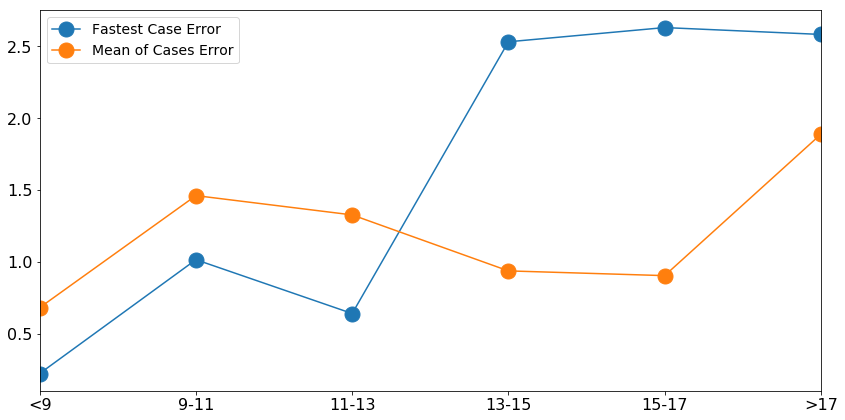

In [268]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
gra18 = pd.DataFrame({'Mean of Cases Error': mean11, 'Fastest Case Error': best11}, index=index)
ax = gra18.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

## Youth Men Ability

In [269]:
you9 = you[(you.query_pb <= 9)]
you11 = you[(you.query_pb > 9) & (you.query_pb <= 11)]
you13 = you[(you.query_pb > 11) & (you.query_pb <= 13)]
you15 = you[(you.query_pb > 13) & (you.query_pb <= 15)]
you17 = you[(you.query_pb > 15) & (you.query_pb <= 17)]
you19 = you[(you.query_pb > 17)]

### Bin counts

In [270]:
you9count = you9.shape[0]
you11count = you11.shape[0]
you13count = you13.shape[0]
you15count = you15.shape[0]
you17count = you17.shape[0]
you19count = you19.shape[0]

In [271]:
count8 = [you9count, you11count, you13count, you15count, you17count, you19count]

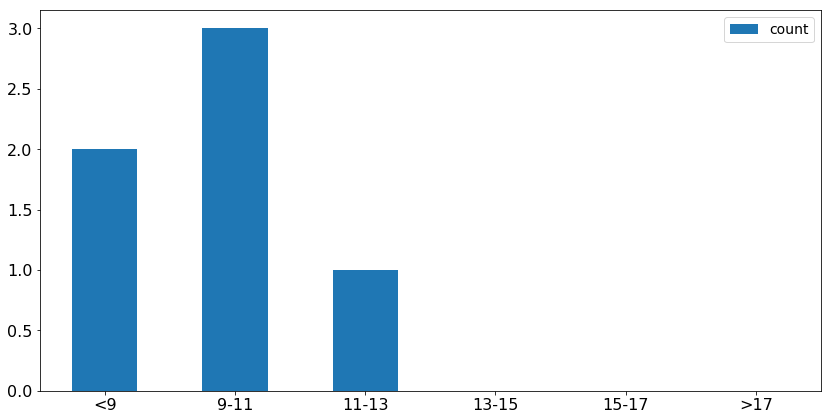

In [272]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count8}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [273]:


you9B = sqrt(mean_squared_error(you9.query_pb, you9.best_pb_prediction))
you9M = sqrt(mean_squared_error(you9.query_pb, you9.mean_pb_average_pace))

#you11B = sqrt(mean_squared_error(you11.query_pb, you11.best_pb_prediction))
#you11M = sqrt(mean_squared_error(you11.query_pb, you11.mean_pb_average_pace))

#you13B = sqrt(mean_squared_error(you13.query_pb, you13.best_pb_prediction))
#you13M = sqrt(mean_squared_error(you13.query_pb, you13.mean_pb_average_pace))

#you15B = sqrt(mean_squared_error(you15.query_pb, you15.best_pb_prediction))
#you15M = sqrt(mean_squared_error(you15.query_pb, you15.mean_pb_average_pace))

#you17B = sqrt(mean_squared_error(you17.query_pb, you17.best_pb_prediction))
#you17M = sqrt(mean_squared_error(you17.query_pb, you17.mean_pb_average_pace))

#you19B = sqrt(mean_squared_error(you19.query_pb, you19.best_pb_prediction))
#you19M = sqrt(mean_squared_error(you19.query_pb, you19.mean_pb_average_pace))


print('Youth Men U9 Fastest Case Error:', you9B)
print('Youth Men U9 Mean of Cases Error:', you9M)
#print('Youth Men 9-11 Fastest Case Error:', you11B)
#print('Youth Men 9-11 Mean of Cases Error:', you11M)
#print('Youth Men 11-13 Fastest Case Error:', you13B)
#print('Youth Men 11-13 Mean of Cases Error:', you13M)
#print('Youth Men 13-15 Fastest Case Error:', you15B)
#print('Youth Men 13-15 Mean of Cases Error:', you15M)
#print('Youth Men 15-17 Fastest Case Error:', you17B)
#print('Youth Men 15-17 Mean of Cases Error:', you17M)
#print('Youth Men O17 Fastest Case Error:', you19B)
#print('Youth Men 017 Mean of Cases Error:', you19M)

Youth Men U9 Fastest Case Error: 0.4219762269228715
Youth Men U9 Mean of Cases Error: 0.887306023522503


# Age Ability

In [274]:
frames = [sg9, sw9]
frames1 = [sg11, sw11]
frames2 = [sg13, sw13]
frames3 = [sg15, sw15]
frames4 = [sg17, sw17]
frames5 = [sg19, sw19]

## 23-39 year old Ability

In [275]:
ageS9 = pd.concat(frames)
ageS11 = pd.concat(frames1)
ageS13 = pd.concat(frames2)
ageS15 = pd.concat(frames3)
ageS17 = pd.concat(frames4)
ageS19 = pd.concat(frames5)

### Bin counts

In [276]:
ageS9count = ageS9.shape[0]
ageS11count = ageS11.shape[0]
ageS13count = ageS13.shape[0]
ageS15count = ageS15.shape[0]
ageS17count = ageS17.shape[0]
ageS19count = ageS19.shape[0]

In [277]:
count_age = [ageS9count, ageS11count, ageS13count, ageS15count, ageS17count, ageS19count]

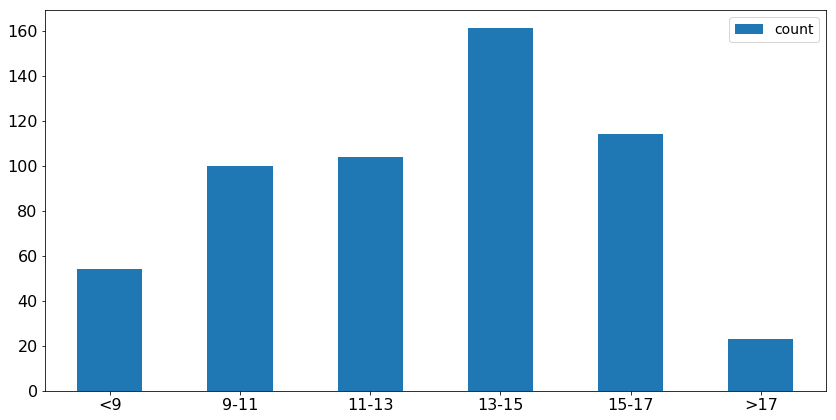

In [278]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ct = pd.DataFrame({'count': count_age}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [279]:

ageS9B = sqrt(mean_squared_error(ageS9.query_pb, ageS9.best_pb_prediction))
ageS9M = sqrt(mean_squared_error(ageS9.query_pb, ageS9.mean_pb_average_pace))

ageS11B = sqrt(mean_squared_error(ageS11.query_pb, ageS11.best_pb_prediction))
ageS11M = sqrt(mean_squared_error(ageS11.query_pb, ageS11.mean_pb_average_pace))

ageS13B = sqrt(mean_squared_error(ageS13.query_pb, ageS13.best_pb_prediction))
ageS13M = sqrt(mean_squared_error(ageS13.query_pb, ageS13.mean_pb_average_pace))

ageS15B = sqrt(mean_squared_error(ageS15.query_pb, ageS15.best_pb_prediction))
ageS15M = sqrt(mean_squared_error(ageS15.query_pb, ageS15.mean_pb_average_pace))

ageS17B = sqrt(mean_squared_error(ageS17.query_pb, ageS17.best_pb_prediction))
ageS17M = sqrt(mean_squared_error(ageS17.query_pb, ageS17.mean_pb_average_pace))

ageS19B = sqrt(mean_squared_error(ageS19.query_pb, ageS19.best_pb_prediction))
ageS19M = sqrt(mean_squared_error(ageS19.query_pb, ageS19.mean_pb_average_pace))


print('Aged 23-39 U9 Fastest Case Error:', ageS9B)
print('Aged 23-39 U9 Mean of Cases Error:', ageS9M)
print('Aged 23-39 9-11 Fastest Case Error:', ageS11B)
print('Aged 23-39 9-11 Mean of Cases Error:', ageS11M)
print('Aged 23-39 11-13 Fastest Case Error:', ageS13B)
print('Aged 23-39 11-13 Mean of Cases Error:', ageS13M)
print('Aged 23-39 13-15 Fastest Case Error:', ageS15B)
print('Aged 23-39 13-15 Mean of Cases Error:', ageS15M)
print('Aged 23-39 15-17 Fastest Case Error:', ageS17B)
print('Aged 23-39 15-17 Mean of Cases Error:', ageS17M)
print('Aged 23-39 O17 Fastest Case Error:', ageS19B)
print('Aged 23-39 017 Mean of Cases Error:', ageS19M)

Aged 23-39 U9 Fastest Case Error: 0.9843557610619458
Aged 23-39 U9 Mean of Cases Error: 1.2378571870146795
Aged 23-39 9-11 Fastest Case Error: 1.576741696446259
Aged 23-39 9-11 Mean of Cases Error: 1.930287135050639
Aged 23-39 11-13 Fastest Case Error: 1.3016593974395279
Aged 23-39 11-13 Mean of Cases Error: 1.5105528558205163
Aged 23-39 13-15 Fastest Case Error: 1.7793076715700578
Aged 23-39 13-15 Mean of Cases Error: 1.1465780471198748
Aged 23-39 15-17 Fastest Case Error: 2.3549316475654813
Aged 23-39 15-17 Mean of Cases Error: 0.9129425797128776
Aged 23-39 O17 Fastest Case Error: 3.2895185901394837
Aged 23-39 017 Mean of Cases Error: 2.087643838491004


In [280]:
mean_age = [ageS9M, ageS11M, ageS13M, ageS15M, ageS17M, ageS19M]
best_age = [ageS9B, ageS11B, ageS13B, ageS15B, ageS17B, ageS19B]

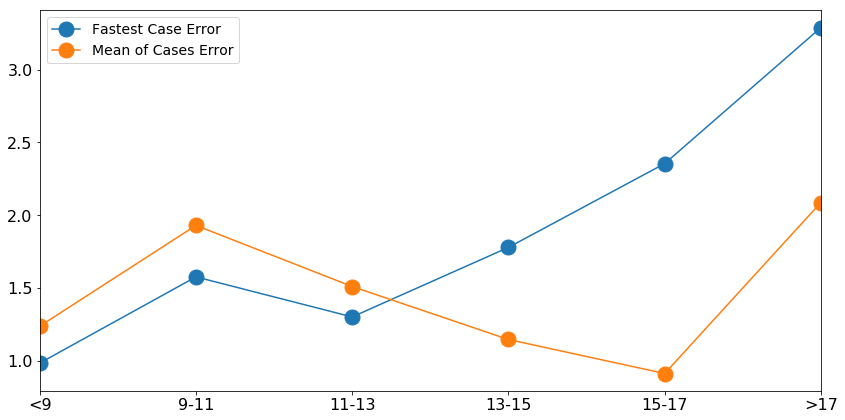

In [281]:
index = ['<9', '9-11', '11-13', '13-15', '15-17', '>17']
ag = pd.DataFrame({'Mean of Cases Error': mean_age, 'Fastest Case Error': best_age}, index=index)
ax = ag.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)

# AGE

In [282]:
g23 = [sen, senW]
g40 = [mas, wom1]
g50 = [mas2, wom2]
g60 = mas3
g20 = you

In [283]:
g23 = pd.concat(g23)
g40 = pd.concat(g40)
g50 = pd.concat(g50)

In [284]:
g23count = g23.shape[0]
g40count = g40.shape[0]
g50count = g50.shape[0]
g60count = g60.shape[0]
g20count = g20.shape[0]

In [285]:
count_G = [g20count, g23count, g40count, g50count, g60count]

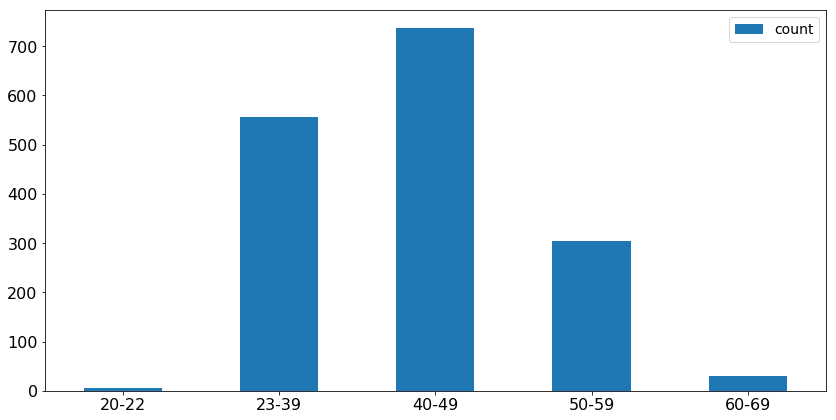

In [286]:
index = ['20-22', '23-39', '40-49', '50-59', '60-69']
ct = pd.DataFrame({'count': count_G}, index=index)
ax = ct.plot.bar(figsize=(14, 7), fontsize=16, rot=0)
ax.legend(fontsize = 14)

In [287]:

g23B = sqrt(mean_squared_error(g23.query_pb, g23.best_pb_prediction))
g23M = sqrt(mean_squared_error(g23.query_pb, g23.mean_pb_average_pace))

g40B = sqrt(mean_squared_error(g40.query_pb, g40.best_pb_prediction))
g40M = sqrt(mean_squared_error(g40.query_pb, g40.mean_pb_average_pace))

g50B = sqrt(mean_squared_error(g50.query_pb, g50.best_pb_prediction))
g50M = sqrt(mean_squared_error(g50.query_pb, g50.mean_pb_average_pace))

g60B = sqrt(mean_squared_error(g60.query_pb, g60.best_pb_prediction))
g60M = sqrt(mean_squared_error(g60.query_pb, g60.mean_pb_average_pace))


print('23-39 Fastest Case Error:', g23B)
print('23-39 Mean of Cases Error:', g23M)
print('40-49 Fastest Case Error:', g40B)
print('40-49 Mean of Cases Error:', g40M)
print('50-59 Fastest Case Error:', g50B)
print('50-59 Mean of Cases Error:', g50M)
print('60-69 Fastest Case Error:', g60B)
print('60-69 Mean of Cases Error:', g60M)

23-39 Fastest Case Error: 1.832927899040623
23-39 Mean of Cases Error: 1.4062812928752315
40-49 Fastest Case Error: 1.851937080334639
40-49 Mean of Cases Error: 1.1219038381248638
50-59 Fastest Case Error: 2.083383988221946
50-59 Mean of Cases Error: 1.376027060225636
60-69 Fastest Case Error: 1.6799237005949446
60-69 Mean of Cases Error: 0.695863469178525


In [288]:
mean_A = [g23M, g40M, g50M, g60M]
best_A = [g23B, g40B, g50B, g60B]

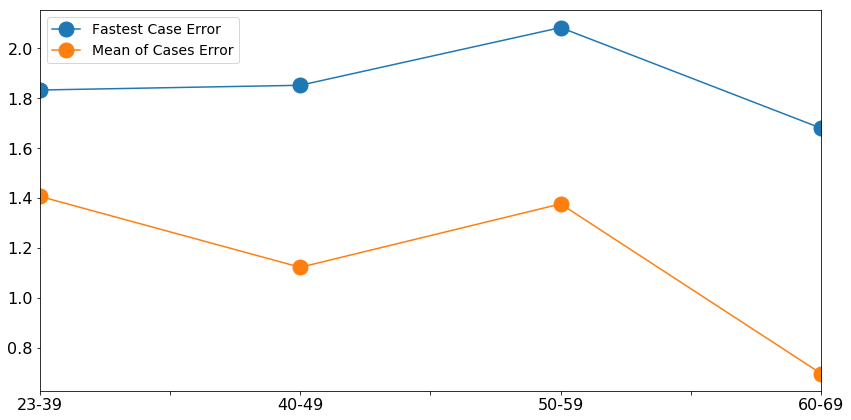

In [289]:
index = ['23-39', '40-49', '50-59', '60-69']
ageG = pd.DataFrame({'Mean of Cases Error': mean_A, 'Fastest Case Error': best_A}, index=index)
ax = ageG.plot(figsize=(14, 7), fontsize=16, rot=0, marker='o', ms=15)
ax.legend(fontsize = 14)